### Background and Context

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

### Objective

To predict which customer is more likely to purchase the newly introduced travel package.

### Data Dictionary

#### Customer details:
<ol>
    <li>CustomerID: Unique customer ID</li>
    <li>ProdTaken: Product taken flag</li>
    <li>Age: Age of customer</li>
    <li>TypeofContact: How customer was contacted (Company Invited or Self Inquiry)</li>
    <li>CityTier: City tier</li>
    <li>Occupation: Occupation of customer</li>
    <li>Gender: Gender of customer</li>
    <li>NumberOfPersonVisited: Total number of person came with customer</li>
    <li>PreferredPropertyStar: Preferred hotel property rating by customer</li>
    <li>MaritalStatus: Marital status of customer</li>
    <li>NumberOfTrips: Average number of the trip in a year by customer</li>
    <li>Passport: The customer has passport or not</li>
    <li>OwnCar: Customers owns a car flag</li>
    <li>NumberOfChildrenVisited: Total number of children with age less than 5 visit with customer</li>
    <li>Designation: Designation of the customer in the current organization</li>
    <li>MonthlyIncome: Gross monthly income of the customer</li>
</ol>

#### Customer interaction data: 

<ol>
    <li>PitchSatisfactionScore: Sales pitch satisfactory score</li>
    <li>ProductPitched: Product pitched by a salesperson</li>
    <li>NumberOfFollowups: Total number of follow up has been done by sales person after sales pitch</li>
    <li>DurationOfPitch: Duration of the pitch by a salesman to customer</li>
</ol>

### Best Practices for Notebook : 

<ul>
    <li>The notebook should be well-documented, with inline comments explaining the functionality of code and markdown cells containing comments on the observations and insights.</li>
    <li>The notebook should be run from start to finish in a sequential manner before submission.</li>
    <li>It is preferable to remove all warnings and errors before submission.</li>
    <li>The notebook should be submitted as an HTML file (.html) and as a notebook file (.ipynb)</li>
</ul>

### Submission Guidelines :

<ol>
<li>There are two parts to the submission:&nbsp;
<ol>
<li>A well commented Jupyter notebook [format - .ipynb]</li>
<li>File converted to HTML format&nbsp;</li>
</ol>
</li>
<li>Any assignment found copied/ plagiarized with other groups will not be graded and awarded zero marks</li>
<li>Please ensure timely submission as any submission post-deadline&nbsp;will not be accepted for evaluation</li>
<li>Submission will not be evaluated if,
<ol>
<li>it is submitted post-deadline, or,</li>
<li>more than 2 files are submitted</li>


In [1]:
# Importing Python Libraries

import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.tree import plot_tree

warnings.filterwarnings('ignore')

#To install xgboost library use - !pip install xgboost 
from xgboost import XGBClassifier

In [2]:
#Converting Excel document to CSV format to read in. Using Pandas .to_csv

data_xls = pd.read_excel('Tourism.xlsx', 'Tourism', dtype=str, index_col=None)
data_xls.to_csv('travel_package_prediction.csv', encoding='utf-8', index=False)

og_travel = pd.read_csv('travel_package_prediction.csv')

#Assigning variable: travel a copy of the original dataset to preserve the dataset. 
#We will make changes and manipulate the copied dataset.
travel = og_travel.copy()

In [4]:
travel.head(10)

(4888, 20)

In [4]:
travel.tail(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
4878,204878,1,35.0,Self Enquiry,1,17.0,Small Business,Male,3,4.0,Deluxe,5.0,Unmarried,3.0,0,4,0,1.0,Manager,24803.0
4879,204879,1,26.0,Self Enquiry,2,27.0,Small Business,Female,4,4.0,Basic,4.0,Married,2.0,1,3,0,2.0,Executive,22347.0
4880,204880,1,59.0,Self Enquiry,1,28.0,Small Business,Female,4,4.0,Deluxe,4.0,Married,6.0,0,3,1,2.0,Manager,28686.0
4881,204881,1,41.0,Self Enquiry,2,25.0,Salaried,Male,3,2.0,Basic,5.0,Married,2.0,0,1,1,2.0,Executive,21065.0
4882,204882,1,37.0,Self Enquiry,2,20.0,Salaried,Male,3,5.0,Basic,5.0,Married,6.0,1,5,1,2.0,Executive,23317.0
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


In [5]:
travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   TypeofContact            4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

In [174]:
travel.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


### Insight:

Age, TypeofContract, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisited, MonhtlyIncome - all have missing data. The total number of records are meant to be 4888, some of these are missing more than others. I will need to investigate further and fix these missing data points

CustomerID will be dropped as it provides no value for our modelling purposes.


In [175]:
travel.nunique()

CustomerID                 4888
ProdTaken                     2
Age                          44
TypeofContact                 2
CityTier                      3
DurationOfPitch              34
Occupation                    4
Gender                        3
NumberOfPersonVisited         5
NumberOfFollowups             6
ProductPitched                5
PreferredPropertyStar         3
MaritalStatus                 4
NumberOfTrips                12
Passport                      2
PitchSatisfactionScore        5
OwnCar                        2
NumberOfChildrenVisited       4
Designation                   5
MonthlyIncome              2475
dtype: int64

### Insight:

There appear to be a large number of columns that contain boolean data, and the others have a low number of unique numbers which suggest that where the data is continous, it might simply be for categorical types and or possibly where there is a small range of recorded values.

I suspect that most of these will be hot encoded later on.

In [176]:
travel[travel.duplicated()].count()

CustomerID                 0
ProdTaken                  0
Age                        0
TypeofContact              0
CityTier                   0
DurationOfPitch            0
Occupation                 0
Gender                     0
NumberOfPersonVisited      0
NumberOfFollowups          0
ProductPitched             0
PreferredPropertyStar      0
MaritalStatus              0
NumberOfTrips              0
Passport                   0
PitchSatisfactionScore     0
OwnCar                     0
NumberOfChildrenVisited    0
Designation                0
MonthlyIncome              0
dtype: int64

In [177]:
travel.isnull().values.any()

True

### Insight:

There are NULL values in the dataset. We will need to explore further to identify the best method of dealing with the null values.


In [178]:
#Investigating the data that contains null values. The following is a list of columns that contain NAN values.
nan_col = ['Age', 'TypeofContact', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'NumberOfChildrenVisited', 'MonthlyIncome']

travel = travel.drop(['CustomerID'], axis=1)

for i in list(nan_col):
    print(travel[i].describe())
    print()

count    4662.000000
mean       37.622265
std         9.316387
min        18.000000
25%        31.000000
50%        36.000000
75%        44.000000
max        61.000000
Name: Age, dtype: float64

count             4863
unique               2
top       Self Enquiry
freq              3444
Name: TypeofContact, dtype: object

count    4637.000000
mean       15.490835
std         8.519643
min         5.000000
25%         9.000000
50%        13.000000
75%        20.000000
max       127.000000
Name: DurationOfPitch, dtype: float64

count    4843.000000
mean        3.708445
std         1.002509
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: NumberOfFollowups, dtype: float64

count    4862.000000
mean        3.581037
std         0.798009
min         3.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: PreferredPropertyStar, dtype: float64

count    4748.000000
mean        3.236521
std   

In [179]:
nan_age = travel[travel['Age'].isnull()]
nan_age.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
4,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
11,0,NaN,Self Enquiry,1,21.0,Salaried,Female,2,4.0,Deluxe,3.0,Single,1.0,1,3,0,0.0,Manager,NaN
19,0,NaN,Self Enquiry,1,8.0,Salaried,Male,2,3.0,Basic,3.0,Single,6.0,1,4,0,1.0,Executive,NaN
20,0,NaN,Company Invited,1,17.0,Salaried,Female,3,2.0,Deluxe,3.0,Married,1.0,0,3,1,2.0,Manager,NaN
21,1,NaN,Self Enquiry,3,15.0,Salaried,Male,2,4.0,Deluxe,5.0,Single,1.0,0,2,0,0.0,Manager,18407.0


In [180]:
#nan_col = ['Age', 'TypeofContact', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'NumberOfChildrenVisited', 'MonthlyIncome']

nan_age[nan_age.Age.isnull() & nan_age.MonthlyIncome.isnull()]



,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
11,0,NaN,Self Enquiry,1,21.0,Salaried,Female,2,4.0,Deluxe,3.0,Single,1.0,1,3,0,0.0,Manager,NaN
19,0,NaN,Self Enquiry,1,8.0,Salaried,Male,2,3.0,Basic,3.0,Single,6.0,1,4,0,1.0,Executive,NaN
20,0,NaN,Company Invited,1,17.0,Salaried,Female,3,2.0,Deluxe,3.0,Married,1.0,0,3,1,2.0,Manager,NaN
26,1,NaN,Company Invited,1,22.0,Salaried,Female,3,5.0,Basic,5.0,Single,2.0,1,4,1,2.0,Executive,NaN
44,0,NaN,Company Invited,1,6.0,Small Business,Female,2,3.0,Deluxe,3.0,Single,2.0,0,3,1,0.0,Manager,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,0,NaN,Self Enquiry,3,35.0,Salaried,Male,3,3.0,Deluxe,5.0,Married,1.0,0,1,1,0.0,Manager,NaN
2363,0,NaN,Self Enquiry,1,7.0,Salaried,Female,3,3.0,Basic,3.0,Married,2.0,0,1,1,2.0,Executive,NaN
2399,1,NaN,Company Invited,3,19.0,Large Business,Female,2,3.0,Deluxe,4.0,Single,6.0,0,3,1,0.0,Manager,NaN
2410,1,NaN,Self Enquiry,1,30.0,Small Business,Male,2,3.0,Basic,4.0,Married,2.0,1,1,0,0.0,Executive,NaN


In [181]:
#Checking if there are any records that have NULL values for all the columns missing values.
nan_age[nan_age[nan_col].isna().all(1)]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome


In [182]:
#Change nuls to check for rows with multiple NaN values
nuls = 3
miss = travel.iloc[travel[(travel.isnull().sum(axis=1) >= nuls)].index]
miss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 224 to 2313
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ProdTaken                25 non-null     int64  
 1   Age                      25 non-null     float64
 2   TypeofContact            0 non-null      object 
 3   CityTier                 25 non-null     int64  
 4   DurationOfPitch          0 non-null      float64
 5   Occupation               25 non-null     object 
 6   Gender                   25 non-null     object 
 7   NumberOfPersonVisited    25 non-null     int64  
 8   NumberOfFollowups        25 non-null     float64
 9   ProductPitched           25 non-null     object 
 10  PreferredPropertyStar    25 non-null     float64
 11  MaritalStatus            25 non-null     object 
 12  NumberOfTrips            25 non-null     float64
 13  Passport                 25 non-null     int64  
 14  PitchSatisfactionScore  

In [183]:
miss.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
224,0,31.0,NaN,1,NaN,Small Business,Male,2,5.0,Deluxe,3.0,Divorced,1.0,0,3,1,0.0,Manager,NaN
571,0,26.0,NaN,1,NaN,Salaried,Female,3,5.0,Basic,3.0,Married,4.0,0,4,1,2.0,Executive,NaN
572,0,29.0,NaN,1,NaN,Small Business,Female,3,3.0,Deluxe,3.0,Divorced,5.0,0,2,1,0.0,Manager,NaN
576,0,27.0,NaN,3,NaN,Small Business,Male,2,3.0,Deluxe,3.0,Divorced,1.0,0,3,0,1.0,Manager,NaN
579,0,34.0,NaN,1,NaN,Small Business,Female,2,4.0,Basic,5.0,Single,2.0,0,2,1,1.0,Executive,NaN


### Insight:

There are no records with more than 3 missing null values.

There are 25 records missing 3 values.

The missing values for these are TypeofContact, DurationOfPitch & MonthlyIncome. I will simply drop these records. 25/4888 is statistically insignificant. Before I decide, I will check the correlation between the features and based on additional exploration, finalize a course of action.

In [184]:
nuls = 2
miss = travel.iloc[travel[(travel.isnull().sum(axis=1) >= nuls)].index]
miss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 11 to 2431
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ProdTaken                227 non-null    int64  
 1   Age                      97 non-null     float64
 2   TypeofContact            202 non-null    object 
 3   CityTier                 227 non-null    int64  
 4   DurationOfPitch          130 non-null    float64
 5   Occupation               227 non-null    object 
 6   Gender                   227 non-null    object 
 7   NumberOfPersonVisited    227 non-null    int64  
 8   NumberOfFollowups        227 non-null    float64
 9   ProductPitched           227 non-null    object 
 10  PreferredPropertyStar    227 non-null    float64
 11  MaritalStatus            227 non-null    object 
 12  NumberOfTrips            227 non-null    float64
 13  Passport                 227 non-null    int64  
 14  PitchSatisfactionScore  

In [185]:
miss[miss['MonthlyIncome'].isnull()]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
11,0,NaN,Self Enquiry,1,21.0,Salaried,Female,2,4.0,Deluxe,3.0,Single,1.0,1,3,0,0.0,Manager,NaN
19,0,NaN,Self Enquiry,1,8.0,Salaried,Male,2,3.0,Basic,3.0,Single,6.0,1,4,0,1.0,Executive,NaN
20,0,NaN,Company Invited,1,17.0,Salaried,Female,3,2.0,Deluxe,3.0,Married,1.0,0,3,1,2.0,Manager,NaN
26,1,NaN,Company Invited,1,22.0,Salaried,Female,3,5.0,Basic,5.0,Single,2.0,1,4,1,2.0,Executive,NaN
44,0,NaN,Company Invited,1,6.0,Small Business,Female,2,3.0,Deluxe,3.0,Single,2.0,0,3,1,0.0,Manager,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,1,34.0,Company Invited,3,NaN,Salaried,Female,2,5.0,Basic,3.0,Single,2.0,0,3,0,1.0,Executive,NaN
2399,1,NaN,Company Invited,3,19.0,Large Business,Female,2,3.0,Deluxe,4.0,Single,6.0,0,3,1,0.0,Manager,NaN
2410,1,NaN,Self Enquiry,1,30.0,Small Business,Male,2,3.0,Basic,4.0,Married,2.0,1,1,0,0.0,Executive,NaN
2430,1,NaN,Self Enquiry,1,14.0,Small Business,Female,3,3.0,Basic,5.0,Married,2.0,1,3,0,2.0,Executive,NaN


In [186]:
na_income = travel[travel['MonthlyIncome'].isnull()]
na_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233 entries, 11 to 2431
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ProdTaken                233 non-null    int64  
 1   Age                      103 non-null    float64
 2   TypeofContact            208 non-null    object 
 3   CityTier                 233 non-null    int64  
 4   DurationOfPitch          136 non-null    float64
 5   Occupation               233 non-null    object 
 6   Gender                   233 non-null    object 
 7   NumberOfPersonVisited    233 non-null    int64  
 8   NumberOfFollowups        233 non-null    float64
 9   ProductPitched           233 non-null    object 
 10  PreferredPropertyStar    233 non-null    float64
 11  MaritalStatus            233 non-null    object 
 12  NumberOfTrips            233 non-null    float64
 13  Passport                 233 non-null    int64  
 14  PitchSatisfactionScore  

In [187]:
#I want to check whether there are any records missing values when MonthlyIncome isn't null.
#Dropping rows where MonthlyIncome is null and then checking for other nulls.

dft = travel.copy()

dft.drop(dft[dft['MonthlyIncome'].isnull()].index, inplace=True)

dft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4655 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ProdTaken                4655 non-null   int64  
 1   Age                      4559 non-null   float64
 2   TypeofContact            4655 non-null   object 
 3   CityTier                 4655 non-null   int64  
 4   DurationOfPitch          4501 non-null   float64
 5   Occupation               4655 non-null   object 
 6   Gender                   4655 non-null   object 
 7   NumberOfPersonVisited    4655 non-null   int64  
 8   NumberOfFollowups        4610 non-null   float64
 9   ProductPitched           4655 non-null   object 
 10  PreferredPropertyStar    4629 non-null   float64
 11  MaritalStatus            4655 non-null   object 
 12  NumberOfTrips            4515 non-null   float64
 13  Passport                 4655 non-null   int64  
 14  PitchSatisfactionScore  

In [188]:
dft.isnull().values.any()

True

### Insight:

There are multiple missing values after dropping the MonthlyIncome nulls.

227 records have 2 missing values.

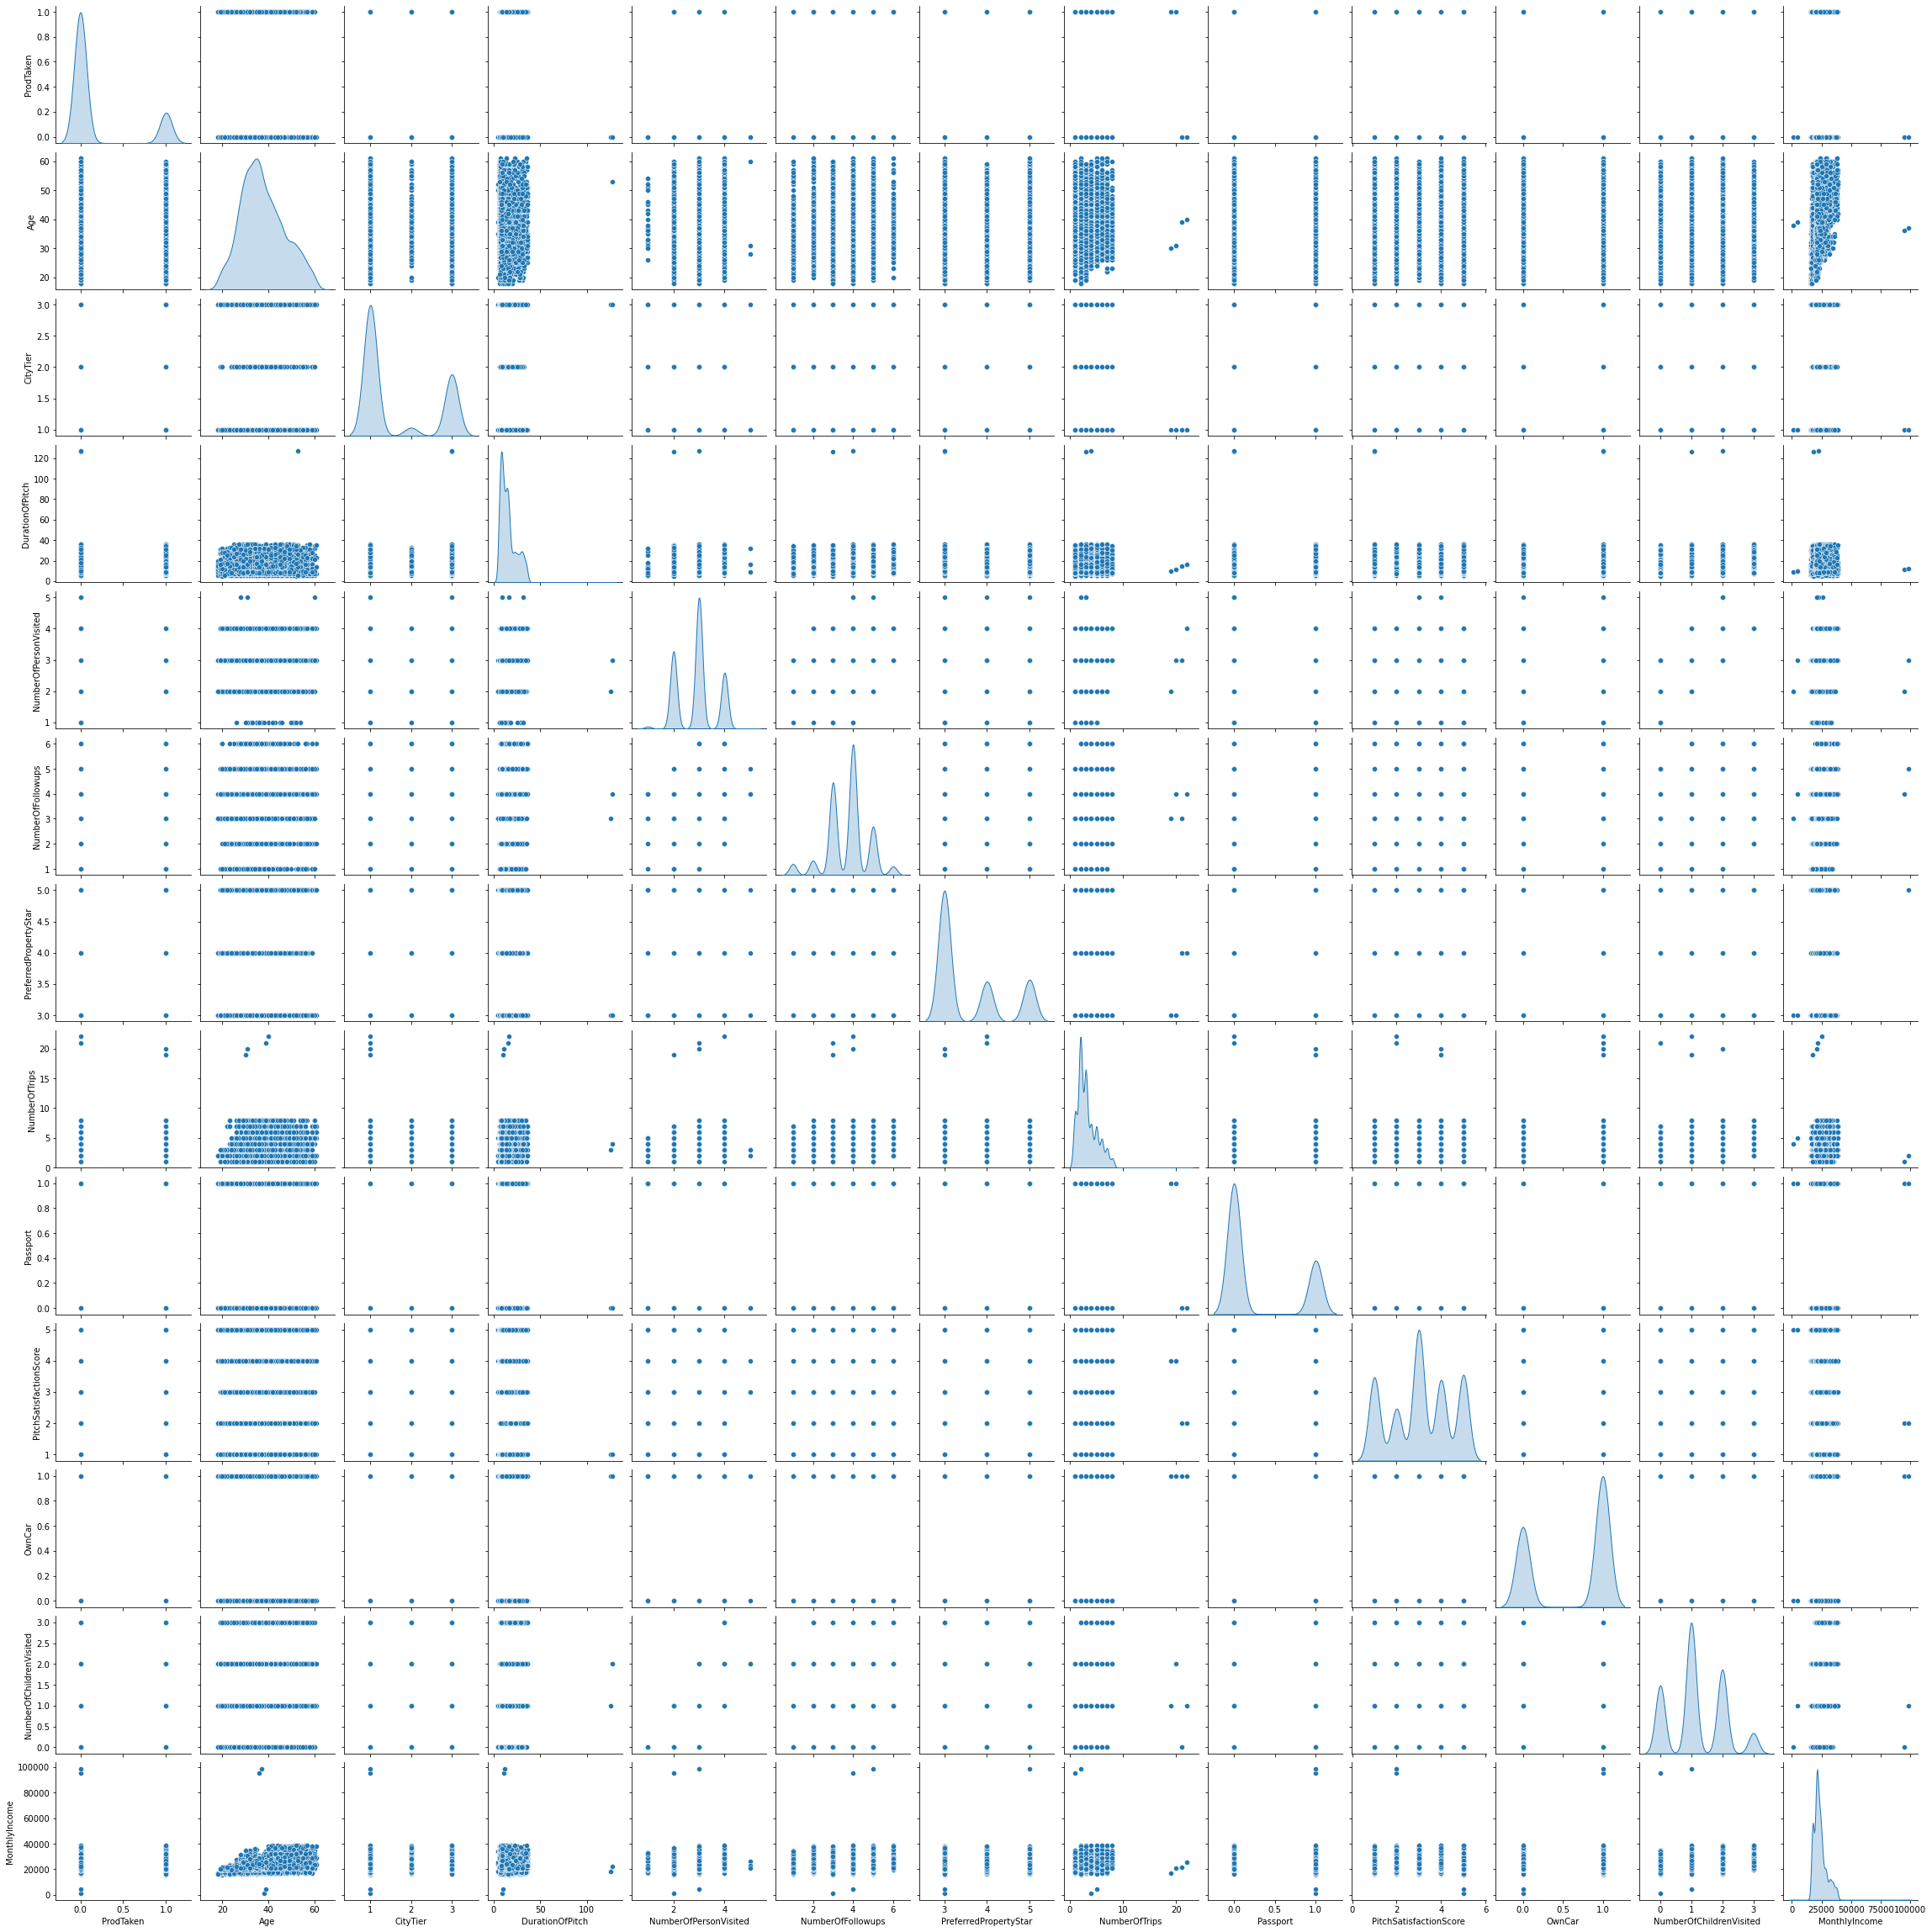

In [189]:
#I am going to explore how the data relates to one another, so I can decide on the best course of action for the NaN values.
sns.pairplot(travel,diag_kind='kde')

In [190]:
travel.groupby(["ProdTaken"]).mean()

,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,MonthlyIncome
ProdTaken,,,,,,,,,,,,
0,38.282092,1.615927,15.169325,2.901714,3.654286,3.542806,3.219531,0.233871,3.044355,0.622984,1.184190,23960.962835
1,34.770548,1.819565,16.873143,2.919565,3.941886,3.746171,3.308370,0.536957,3.223913,0.608696,1.200438,22172.827703


In [191]:
travel.corr()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,MonthlyIncome
ProdTaken,1.000000,-0.147254,0.086852,0.078257,0.009627,0.112171,0.099577,0.018898,0.260844,0.051394,-0.011508,0.007421,-0.130585
Age,-0.147254,1.000000,-0.015625,-0.012063,0.011621,-0.002577,-0.010474,0.184905,0.033399,0.018510,0.048654,0.007370,0.464869
CityTier,0.086852,-0.015625,1.000000,0.022703,-0.001671,0.023652,-0.009164,-0.029709,0.001793,-0.042160,0.003817,0.000672,0.051817
DurationOfPitch,0.078257,-0.012063,0.022703,1.000000,0.065141,0.009434,-0.006637,0.009715,0.033034,-0.002880,-0.001626,0.031408,-0.006252
NumberOfPersonVisited,0.009627,0.011621,-0.001671,0.065141,1.000000,0.328569,0.033867,0.195223,0.011177,-0.019581,0.010362,0.610621,0.195134
NumberOfFollowups,0.112171,-0.002577,0.023652,0.009434,0.328569,1.000000,-0.024176,0.139517,0.004970,0.004054,0.012112,0.286425,0.176503
PreferredPropertyStar,0.099577,-0.010474,-0.009164,-0.006637,0.033867,-0.024176,1.000000,0.012115,0.001040,-0.022701,0.015742,0.035798,0.014289
NumberOfTrips,0.018898,0.184905,-0.029709,0.009715,0.195223,0.139517,0.012115,1.000000,0.012949,-0.004378,-0.011825,0.168795,0.139105
Passport,0.260844,0.033399,0.001793,0.033034,0.011177,0.004970,0.001040,0.012949,1.000000,0.002926,-0.022330,0.020264,0.002545
PitchSatisfactionScore,0.051394,0.018510,-0.042160,-0.002880,-0.019581,0.004054,-0.022701,-0.004378,0.002926,1.000000,0.068850,0.000878,0.030421


In [192]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

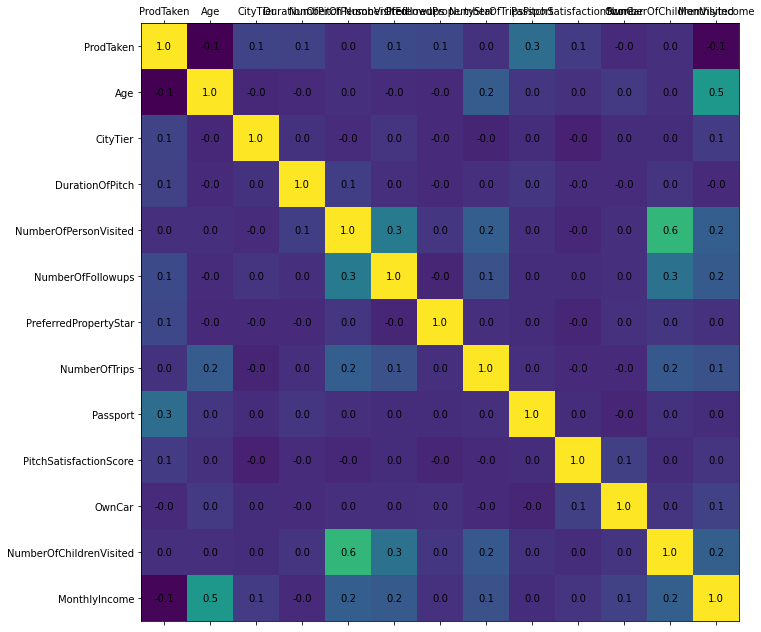

In [193]:
plot_corr(travel)

In [194]:
pd.crosstab(travel['MonthlyIncome'],travel['ProdTaken'],normalize='columns')

ProdTaken,0,1
MonthlyIncome,,
1000.0,0.000265,0.000000
4678.0,0.000265,0.000000
16009.0,0.000000,0.002252
16051.0,0.000531,0.000000
16052.0,0.000531,0.000000
...,...,...
38621.0,0.000531,0.000000
38651.0,0.000531,0.000000
38677.0,0.000531,0.000000


In [195]:
lis_col = ['TypeofContact', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfChildrenVisited']
for i in list(lis_col):
    print(pd.crosstab(travel[i],travel['ProdTaken'],normalize='columns'))
    print()

ProdTaken               0         1
TypeofContact                      
Company Invited  0.281044  0.338059
Self Enquiry     0.718956  0.661941

ProdTaken                 0         1
NumberOfFollowups                    
1.0                0.039685  0.021930
2.0                0.052150  0.026316
3.0                0.310862  0.267544
4.0                0.429662  0.415570
5.0                0.146782  0.209430
6.0                0.020860  0.059211

ProdTaken                     0         1
PreferredPropertyStar                    
3.0                    0.636018  0.527352
4.0                    0.185157  0.199125
5.0                    0.178825  0.273523

ProdTaken                       0         1
NumberOfChildrenVisited                    
0.0                      0.225122  0.221249
1.0                      0.431824  0.429354
2.0                      0.276797  0.277108
3.0                      0.066257  0.072289



In [196]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

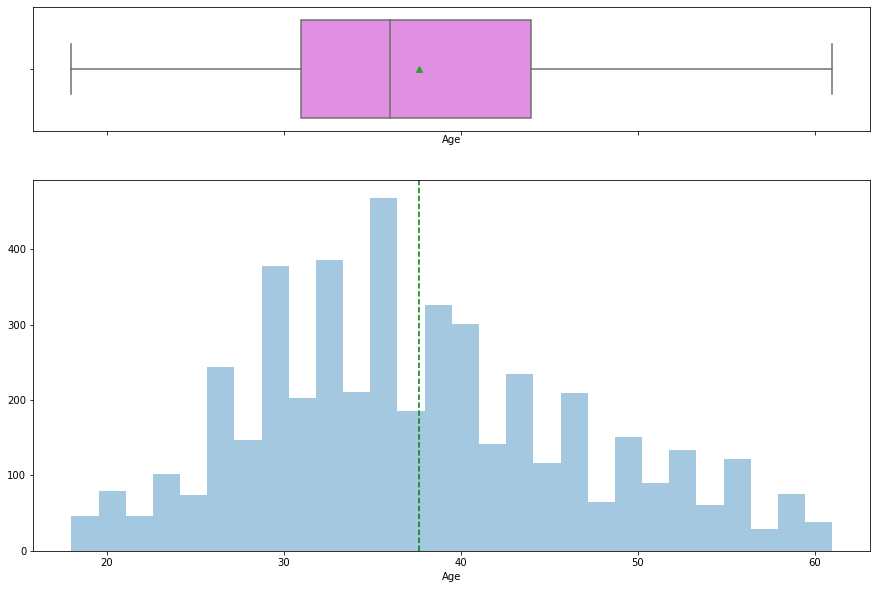

In [197]:
histogram_boxplot(travel['Age'])

### Insight:

Age is slightly skewed on the younger side. There are not statistical outliers to be addressed.

The disribution appears to be relatively normal. I have no concerns with regards to the Age feature.

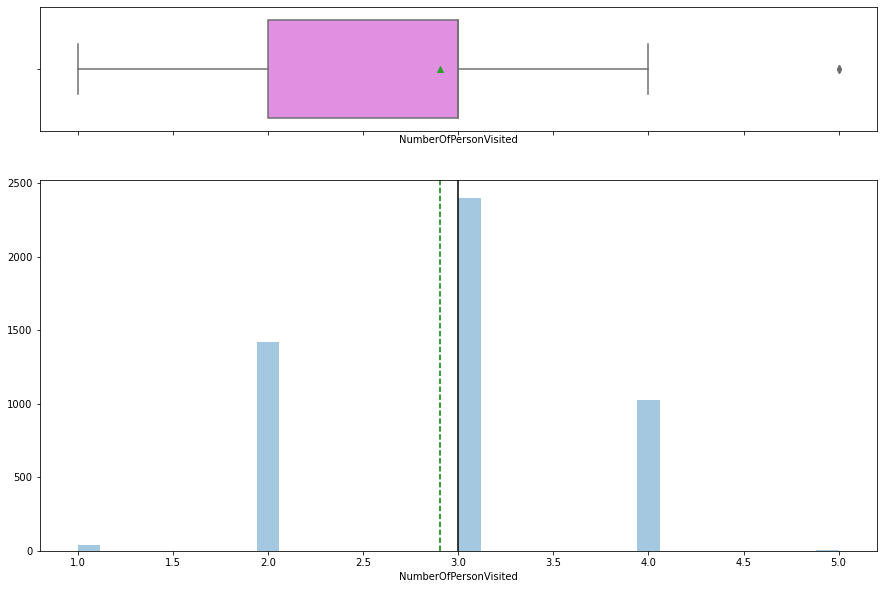

In [198]:
histogram_boxplot(travel['NumberOfPersonVisited'])

In [6]:
pd.crosstab(travel['ProductPitched'],travel['ProdTaken'],normalize='columns')

ProdTaken,0,1
ProductPitched,,
Basic,0.325101,0.600000
Deluxe,0.385081,0.221739
King,0.052923,0.021739
Standard,0.155746,0.134783
Super Deluxe,0.081149,0.021739


### Insight:

Low variance for the Number of Persons Visited.

Could potentially convert to a categorical feature as we cannot have fractions of people.

It would increase the number of features by 5, increasing computational complexity and cost.

The cross tabulation suggests we can drop records where NumberOfPerson = 1 or 5. And then convert to a categorical variable.



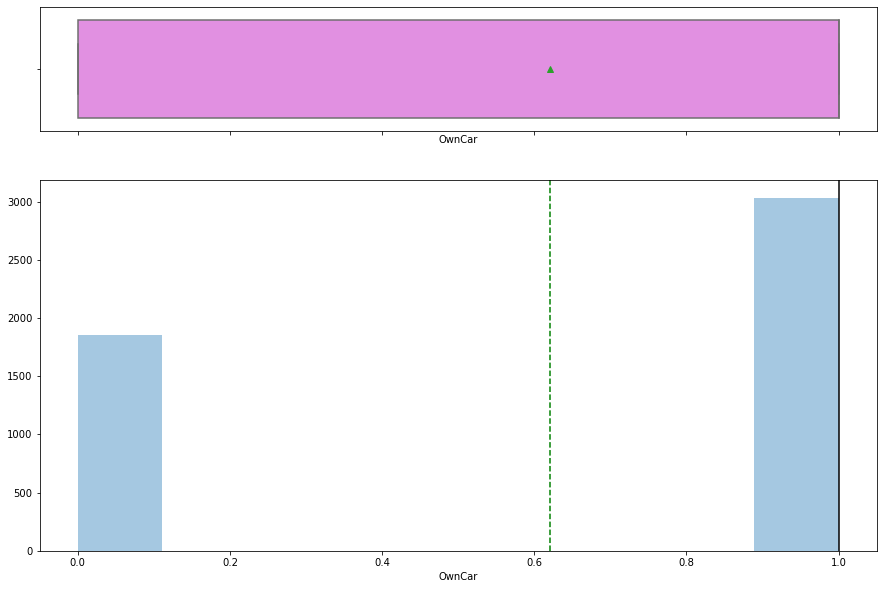

In [200]:
histogram_boxplot(travel['OwnCar'])

In [201]:
pd.crosstab(travel['OwnCar'],travel['ProdTaken'],normalize='columns')

ProdTaken,0,1
OwnCar,,
0,0.377016,0.391304
1,0.622984,0.608696


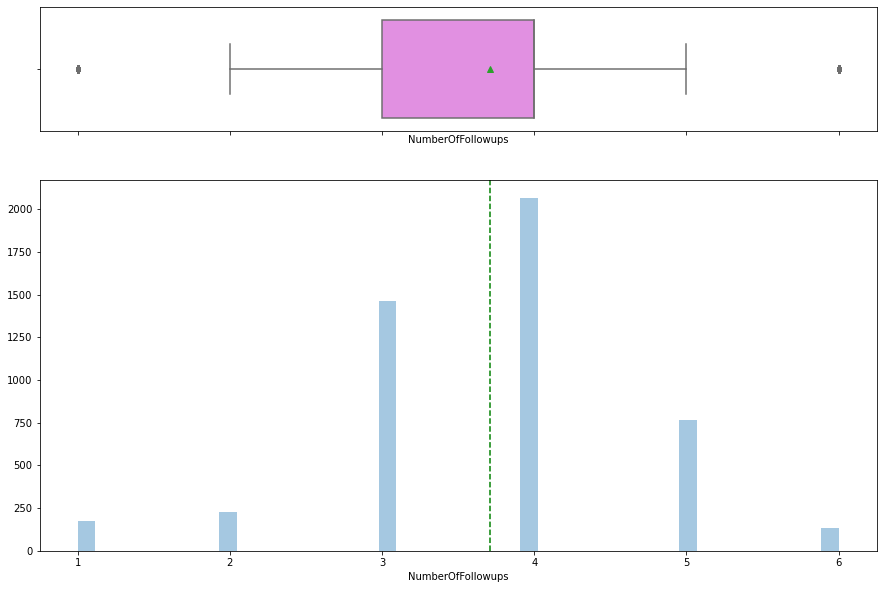

In [202]:
histogram_boxplot(travel['NumberOfFollowups'])

### Insight:

This feature will be dropped as it is a metric generated after a interaction with the customer. We want to target the before.

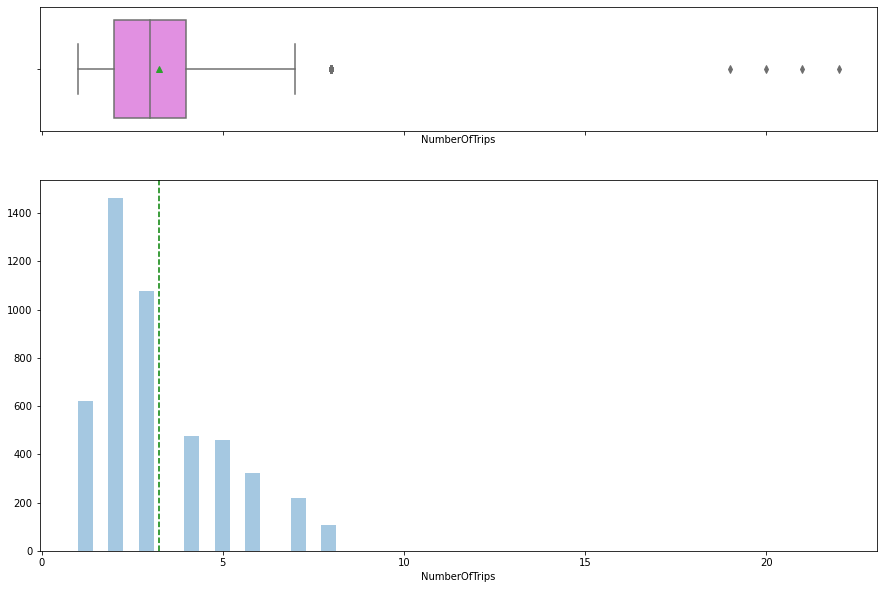

In [203]:
histogram_boxplot(travel['NumberOfTrips'])

In [204]:
pd.crosstab(travel['NumberOfTrips'],travel['ProdTaken'],normalize='columns')

ProdTaken,0,1
NumberOfTrips,,
1.0,0.132292,0.123348
2.0,0.303385,0.329295
3.0,0.224479,0.238987
4.0,0.108594,0.067181
5.0,0.103125,0.068282
6.0,0.067187,0.070485
7.0,0.040625,0.068282
8.0,0.019792,0.031938
19.0,0.000000,0.001101


### Insight:

There are 4 statistically significant outliers.

Two of which have no correlation with our target variable when it is 1. Considering we are interested in targeting customers who have ProdTaken = 1. We can feasibly drop the records which have the statistcal outlier.


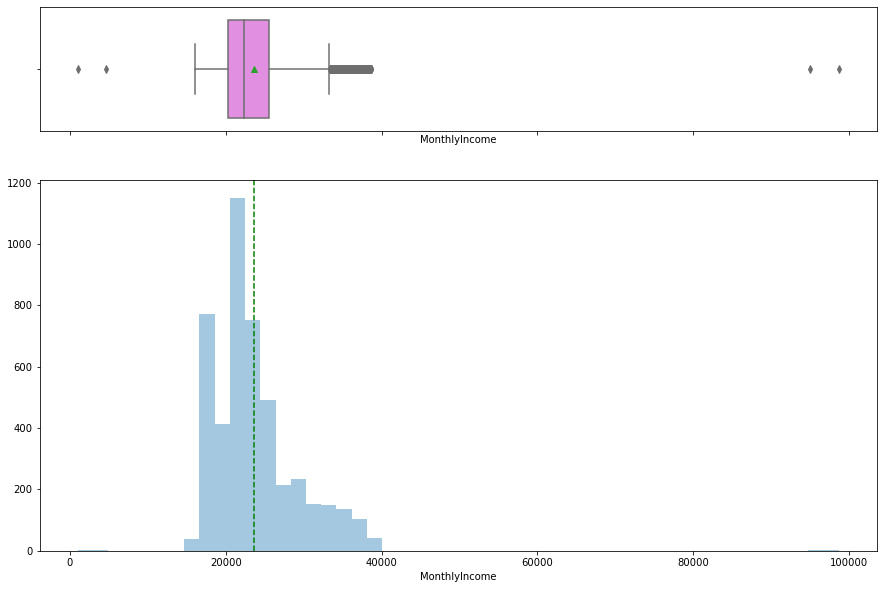

In [205]:
histogram_boxplot(travel['MonthlyIncome'])

In [206]:
travel['ProdTaken'].value_counts()

0    3968
1     920
Name: ProdTaken, dtype: int64

In [207]:
travel['Gender'].value_counts()

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

In [208]:
travel['MonthlyIncome'].sort_values(ascending=False)

2482    98678.0
38      95000.0
4104    38677.0
2634    38677.0
3190    38651.0
         ...   
2390        NaN
2399        NaN
2410        NaN
2430        NaN
2431        NaN
Name: MonthlyIncome, Length: 4888, dtype: float64

### Insight:

I will be dropping the Customer Interaction Data columns as it has no predictive benefit for the model. These are metrics recorded after a customer was approached, we want to predict which customers to approach. Therefore, these columns will not aid us in our predictive models.

Age, MonthlyIncome - two columns missing values currently have weak negative correlation, with Age being a stronger negative correlation than other features. While feature OwnCar is the only other column with a waek negative correlation.

The remaining features all have weak, positive correlation with Passport having the strong positive correlation.

The outliers not mentioned in previous insights will be left in place, as we will be using ensemble methods that are not sensitive to outliers.

The ProdTaken distribution is heavily skewed in favor of "No". We will take this into account later on in the model building and tuning.

Gender has has a incorrect value of "Fe Male", it will be corrected to "Female"

### Customer Profile for Different Packages

### Package: Basic

In [209]:
basic = travel.loc[travel['ProductPitched'] == "Basic"]
basic = basic.loc[basic['ProdTaken'] == 1]
basic.describe()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,MonthlyIncome
count,552.0,515.000000,552.000000,532.000000,552.000000,548.000000,552.000000,547.000000,552.000000,552.000000,552.000000,551.000000,529.000000
mean,1.0,31.289320,1.510870,15.791353,2.905797,3.950730,3.771739,3.226691,0.583333,3.213768,0.572464,1.221416,20161.529301
std,0.0,9.070829,0.832566,7.906926,0.701439,0.967166,0.861812,2.081618,0.493454,1.353074,0.495170,0.866537,3313.289684
min,1.0,18.000000,1.000000,6.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,16009.000000
25%,1.0,25.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,17546.000000
50%,1.0,30.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,1.000000,3.000000,1.000000,1.000000,20582.000000
75%,1.0,35.000000,2.000000,22.000000,3.000000,5.000000,5.000000,4.000000,1.000000,4.000000,1.000000,2.000000,21394.000000
max,1.0,59.000000,3.000000,36.000000,4.000000,6.000000,5.000000,20.000000,1.000000,5.000000,1.000000,3.000000,37868.000000


In [210]:
arr = ['Age', 'TypeofContact', 'CityTier', 'Occupation', 'Gender', 'NumberOfPersonVisited', 'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport', 'OwnCar', 'NumberOfChildrenVisited', 'Designation']

for i in list(arr):
    print([i])
    print(basic[i].mode())
    

['Age']
0    29.0
dtype: float64
['TypeofContact']
0    Self Enquiry
dtype: object
['CityTier']
0    1
dtype: int64
['Occupation']
0    Salaried
dtype: object
['Gender']
0    Male
dtype: object
['NumberOfPersonVisited']
0    3
dtype: int64
['PreferredPropertyStar']
0    3.0
dtype: float64
['MaritalStatus']
0    Single
dtype: object
['NumberOfTrips']
0    2.0
dtype: float64
['Passport']
0    1
dtype: int64
['OwnCar']
0    1
dtype: int64
['NumberOfChildrenVisited']
0    1.0
dtype: float64
['Designation']
0    Executive
dtype: object


### Ideal Customer Profile: Basic

<ul>
    <li><b>Age: </b> 29~</li>
    <li><b>TypeofContact: </b> Self Enquiry</li>
    <li><b>CityTier: </b> 1</li>
    <li><b>Occupation: </b> Salaried</li>
    <li><b>Gender: </b> Male</li>
    <li><b>NumberOfPersonVisited: </b> 3~</li>
    <li><b>PreferredPropertyStar: </b> 3~</li>
    <li><b>MaritalStatus: </b> Single</li>
    <li><b>NumberOfTrips: </b> 2~</li>
    <li><b>Passport: </b> Yes</li>
    <li><b>OwnCar: </b> Yes</li>
    <li><b>NumberOfChildrenVisited: </b> 1+</li>
    <li><b>Designation: </b> Executive</li>
    <li><b>MonthlyIncome: </b> $20,000~</li>
 </ul>

### Package: Standard

In [211]:
std = travel.loc[travel['ProductPitched'] == "Standard"]
std = std.loc[std['ProdTaken'] == 1]
std.describe()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,MonthlyIncome
count,124.0,123.000000,124.000000,123.000000,124.000000,124.000000,123.000000,123.000000,124.000000,124.000000,124.000000,123.000000,124.000000
mean,1.0,41.008130,2.096774,19.065041,2.967742,3.935484,3.731707,3.016260,0.387097,3.467742,0.661290,1.121951,26035.419355
std,0.0,9.876695,0.966255,9.048811,0.709236,0.908335,0.878460,1.815163,0.489062,1.309350,0.475191,0.901596,3593.290353
min,1.0,19.000000,1.000000,6.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,17372.000000
25%,1.0,33.000000,1.000000,11.000000,2.000000,3.000000,3.000000,2.000000,0.000000,3.000000,0.000000,0.000000,23974.750000
50%,1.0,38.000000,3.000000,17.000000,3.000000,4.000000,3.000000,2.000000,0.000000,3.000000,1.000000,1.000000,25711.000000
75%,1.0,49.000000,3.000000,29.000000,3.000000,4.250000,5.000000,4.000000,1.000000,5.000000,1.000000,2.000000,28628.000000
max,1.0,60.000000,3.000000,36.000000,4.000000,6.000000,5.000000,8.000000,1.000000,5.000000,1.000000,3.000000,38395.000000


In [212]:
for i in list(arr):
    print([i])
    print(std[i].mode())

['Age']
0    29.0
1    34.0
2    37.0
dtype: float64
['TypeofContact']
0    Self Enquiry
dtype: object
['CityTier']
0    3
dtype: int64
['Occupation']
0    Small Business
dtype: object
['Gender']
0    Male
dtype: object
['NumberOfPersonVisited']
0    3
dtype: int64
['PreferredPropertyStar']
0    3.0
dtype: float64
['MaritalStatus']
0    Married
dtype: object
['NumberOfTrips']
0    2.0
dtype: float64
['Passport']
0    0
dtype: int64
['OwnCar']
0    1
dtype: int64
['NumberOfChildrenVisited']
0    1.0
dtype: float64
['Designation']
0    Senior Manager
dtype: object


### Ideal Customer Profile: Standard

<ul>
    <li><b>Age: </b> 29+</li>
    <li><b>TypeofContact: </b> Self Enquiry</li>
    <li><b>CityTier: </b> 3</li>
    <li><b>Occupation: </b> Small Business</li>
    <li><b>Gender: </b> Male</li>
    <li><b>NumberOfPersonVisited: </b> 3~</li>
    <li><b>PreferredPropertyStar: </b>3 </li>
    <li><b>MaritalStatus: </b> Married</li>
    <li><b>NumberOfTrips: </b> 2~</li>
    <li><b>Passport: </b> Doesn't matter</li>
    <li><b>OwnCar: </b> Yes</li>
    <li><b>NumberOfChildrenVisited: </b> 1+</li>
    <li><b>Designation: </b> Senior Manager</li>
    <li><b>MonthlyIncome: </b> $26,000~</li>
 </ul>

### Package: Deluxe

In [213]:
dlx = travel.loc[travel['ProductPitched'] == "Deluxe"]
dlx = dlx.loc[dlx['ProdTaken'] == 1]
dlx.describe()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,MonthlyIncome
count,204.0,198.000000,204.000000,180.000000,204.000000,200.000000,203.000000,202.000000,204.000000,204.000000,204.000000,203.000000,195.000000
mean,1.0,37.641414,2.411765,19.100000,2.950980,3.970000,3.699507,3.702970,0.490196,3.039216,0.607843,1.172414,23106.215385
std,0.0,8.469575,0.913532,9.227176,0.707141,1.051011,0.857899,2.022483,0.501134,1.278250,0.489432,0.841279,3592.466947
min,1.0,21.000000,1.000000,6.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,17086.000000
25%,1.0,32.000000,1.000000,11.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20744.000000
50%,1.0,35.500000,3.000000,16.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,23186.000000
75%,1.0,44.000000,3.000000,28.000000,3.000000,5.000000,5.000000,5.000000,1.000000,4.000000,1.000000,2.000000,24506.000000
max,1.0,59.000000,3.000000,36.000000,4.000000,6.000000,5.000000,8.000000,1.000000,5.000000,1.000000,3.000000,38525.000000


In [214]:
for i in list(arr):
    print([i])
    print(dlx[i].mode())

['Age']
0    32.0
dtype: float64
['TypeofContact']
0    Self Enquiry
dtype: object
['CityTier']
0    3
dtype: int64
['Occupation']
0    Small Business
dtype: object
['Gender']
0    Male
dtype: object
['NumberOfPersonVisited']
0    3
dtype: int64
['PreferredPropertyStar']
0    3.0
dtype: float64
['MaritalStatus']
0    Married
dtype: object
['NumberOfTrips']
0    2.0
dtype: float64
['Passport']
0    0
dtype: int64
['OwnCar']
0    1
dtype: int64
['NumberOfChildrenVisited']
0    1.0
dtype: float64
['Designation']
0    Manager
dtype: object


### Ideal Customer Profile: Deluxe

<ul>
    <li><b>Age: </b> 32~</li>
    <li><b>TypeofContact: </b> Self Enquiry</li>
    <li><b>CityTier: </b> 3</li>
    <li><b>Occupation: </b> Small Business</li>
    <li><b>Gender: </b> Male</li>
    <li><b>NumberOfPersonVisited: </b> 3~</li>
    <li><b>PreferredPropertyStar: </b> 3</li>
    <li><b>MaritalStatus: </b> Married</li>
    <li><b>NumberOfTrips: </b> 2~</li>
    <li><b>Passport: </b> Doesn't matter</li>
    <li><b>OwnCar: </b> Yes</li>
    <li><b>NumberOfChildrenVisited: </b> 1+</li>
    <li><b>Designation: </b> Manager</li>
    <li><b>MonthlyIncome: </b> $23,000~</li>
 </ul>

### Package: Super Deluxe

In [215]:
sdlx = travel.loc[travel['ProductPitched'] == "Super Deluxe"]
sdlx = sdlx.loc[sdlx['ProdTaken'] == 1]
sdlx.describe()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,MonthlyIncome
count,20.0,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,19.000000,20.000000,20.000000,20.0,20.000000,20.000000
mean,1.0,43.50000,2.600000,18.500000,2.700000,3.100000,3.600000,3.263158,0.600000,3.800000,1.0,1.200000,29823.800000
std,0.0,4.83953,0.820783,7.330542,0.656947,1.618967,0.820783,2.490919,0.502625,1.005249,0.0,0.833509,3520.426404
min,1.0,39.00000,1.000000,8.000000,2.000000,1.000000,3.000000,1.000000,0.000000,3.000000,1.0,0.000000,21151.000000
25%,1.0,40.00000,3.000000,15.000000,2.000000,2.000000,3.000000,1.000000,0.000000,3.000000,1.0,1.000000,28129.500000
50%,1.0,42.00000,3.000000,18.500000,3.000000,3.000000,3.000000,2.000000,1.000000,3.000000,1.0,1.000000,29802.500000
75%,1.0,45.25000,3.000000,20.000000,3.000000,4.000000,4.000000,5.500000,1.000000,5.000000,1.0,2.000000,31997.250000
max,1.0,56.00000,3.000000,31.000000,4.000000,6.000000,5.000000,8.000000,1.000000,5.000000,1.0,3.000000,37502.000000


In [216]:
for i in list(arr):
    print([i])
    print(sdlx[i].mode())

['Age']
0    40.0
dtype: float64
['TypeofContact']
0    Company Invited
dtype: object
['CityTier']
0    3
dtype: int64
['Occupation']
0    Salaried
dtype: object
['Gender']
0    Male
dtype: object
['NumberOfPersonVisited']
0    3
dtype: int64
['PreferredPropertyStar']
0    3.0
dtype: float64
['MaritalStatus']
0    Single
dtype: object
['NumberOfTrips']
0    1.0
1    2.0
dtype: float64
['Passport']
0    1
dtype: int64
['OwnCar']
0    1
dtype: int64
['NumberOfChildrenVisited']
0    1.0
dtype: float64
['Designation']
0    AVP
dtype: object


### Ideal Customer Profile: Super Deluxe

<ul>
    <li><b>Age: </b> 40+</li>
    <li><b>TypeofContact: </b> Company Invited</li>
    <li><b>CityTier: </b> 3</li>
    <li><b>Occupation: </b> Salaried</li>
    <li><b>Gender: </b> Male</li>
    <li><b>NumberOfPersonVisited: </b> 3~</li>
    <li><b>PreferredPropertyStar: </b> 3</li>
    <li><b>MaritalStatus: </b> Single</li>
    <li><b>NumberOfTrips: </b> 1+ </li>
    <li><b>Passport: </b> Yes</li>
    <li><b>OwnCar: </b> Yes</li>
    <li><b>NumberOfChildrenVisited: </b> 1+</li>
    <li><b>Designation: </b> AVP</li>
    <li><b>MonthlyIncome: </b> $29,000+</li>
 </ul>

### Package: King

In [217]:
king = travel.loc[travel['ProductPitched'] == "King"]
king = king.loc[king['ProdTaken'] == 1]
king.describe()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,MonthlyIncome
count,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,16.00000,17.000000,20.000000,20.000000,20.000000,16.000000,20.000000
mean,1.0,48.900000,1.800000,10.500000,2.900000,4.300000,3.75000,3.411765,0.600000,3.300000,0.900000,1.437500,34672.100000
std,0.0,9.618513,1.005249,4.135851,0.718185,1.128576,0.68313,1.938389,0.502625,1.218282,0.307794,0.892095,5577.603833
min,1.0,27.000000,1.000000,8.000000,2.000000,3.000000,3.00000,1.000000,0.000000,1.000000,0.000000,0.000000,17517.000000
25%,1.0,42.000000,1.000000,8.000000,2.000000,3.000000,3.00000,2.000000,0.000000,3.000000,1.000000,1.000000,34470.250000
50%,1.0,52.500000,1.000000,9.000000,3.000000,4.000000,4.00000,3.000000,1.000000,3.000000,1.000000,1.000000,34859.000000
75%,1.0,56.000000,3.000000,9.000000,3.000000,5.000000,4.00000,4.000000,1.000000,4.000000,1.000000,2.000000,38223.000000
max,1.0,59.000000,3.000000,19.000000,4.000000,6.000000,5.00000,7.000000,1.000000,5.000000,1.000000,3.000000,38537.000000


In [218]:
for i in list(arr):
    print([i])
    print(king[i].mode())

['Age']
0    41.0
1    42.0
2    52.0
3    53.0
4    55.0
5    56.0
6    58.0
7    59.0
dtype: float64
['TypeofContact']
0    Self Enquiry
dtype: object
['CityTier']
0    1
dtype: int64
['Occupation']
0    Small Business
dtype: object
['Gender']
0    Female
dtype: object
['NumberOfPersonVisited']
0    3
dtype: int64
['PreferredPropertyStar']
0    4.0
dtype: float64
['MaritalStatus']
0    Single
dtype: object
['NumberOfTrips']
0    3.0
dtype: float64
['Passport']
0    1
dtype: int64
['OwnCar']
0    1
dtype: int64
['NumberOfChildrenVisited']
0    1.0
dtype: float64
['Designation']
0    VP
dtype: object


### Ideal Customer Profile: King

<ul>
    <li><b>Age: </b> 41+</li>
    <li><b>TypeofContact: </b> Self Enquiry</li>
    <li><b>CityTier: </b> 1</li>
    <li><b>Occupation: </b> Small Business</li>
    <li><b>Gender: </b> Female</li>
    <li><b>NumberOfPersonVisited: </b> 3~</li>
    <li><b>PreferredPropertyStar: </b> 4</li>
    <li><b>MaritalStatus: </b> Single</li>
    <li><b>NumberOfTrips: </b> 3~</li>
    <li><b>Passport: </b> Yes</li>
    <li><b>OwnCar: </b> Yes</li>
    <li><b>NumberOfChildrenVisited: </b> 1+</li>
    <li><b>Designation: </b> VP</li>
    <li><b>MonthlyIncome: </b> $34,000+ </li>
 </ul>

### Null Values:

I will now fix the missing values and complete some feature selection.

I will be dropping the features that are included in Customer Interaction Data, as these are all based on Products being Pitched and how the customers responded. The business case requires us to predict which customers would buy the new package, therefore the data related to how the existing packages were pitched.

The features being dropped would be better suited to understanding how products should be pitched.


In [8]:
df = og_travel.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   TypeofContact            4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

In [9]:
df["TypeofContact"].fillna("Self Enquiry", inplace = True)

In [10]:
#Customer Interaction Data to be excluded
df = df.drop(['DurationOfPitch'], axis=1)

In [11]:
#Customer Interaction Data to be excluded
df = df.drop(['NumberOfFollowups'], axis=1)

In [12]:
df["PreferredPropertyStar"].fillna(df['PreferredPropertyStar'].mode()[0], inplace = True)

In [13]:
df["NumberOfTrips"].fillna(df['NumberOfTrips'].mode()[0], inplace = True)

In [14]:
df["NumberOfChildrenVisited"].fillna(df['NumberOfChildrenVisited'].mode()[0], inplace = True)

In [15]:
df["Age"].fillna(df['Age'].mode()[0], inplace = True)

In [16]:
df["MonthlyIncome"].fillna(df['MonthlyIncome'].mean(), inplace = True)

In [17]:
#Customer Interaction Data to be excluded
df = df.drop(['PitchSatisfactionScore'], axis=1)

In [18]:
#Customer Interaction Data to be excluded
df = df.drop(['ProductPitched'], axis=1)

In [19]:
#Fixing incorrectly captured gender values
df['Gender'].mask(df['Gender'] == 'Fe Male', 'Female', inplace=True)
df['Gender'].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

In [20]:
#Dropped two insignificant outliers as mentioned above
df = df.drop(df[df['NumberOfTrips'] > 20].index)

In [21]:
#Dropping the two outliers, as we will reduce the computational cost when converting to categorical
df = df.drop(df[df['NumberOfPersonVisited'] == 1].index)
df = df.drop(df[df['NumberOfPersonVisited'] == 5].index)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4844 entries, 0 to 4887
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4844 non-null   int64  
 1   ProdTaken                4844 non-null   int64  
 2   Age                      4844 non-null   float64
 3   TypeofContact            4844 non-null   object 
 4   CityTier                 4844 non-null   int64  
 5   Occupation               4844 non-null   object 
 6   Gender                   4844 non-null   object 
 7   NumberOfPersonVisited    4844 non-null   int64  
 8   PreferredPropertyStar    4844 non-null   float64
 9   MaritalStatus            4844 non-null   object 
 10  NumberOfTrips            4844 non-null   float64
 11  Passport                 4844 non-null   int64  
 12  OwnCar                   4844 non-null   int64  
 13  NumberOfChildrenVisited  4844 non-null   float64
 14  Designation             

### Linear Regression for MonthlyIncome

Feel free to skip this part. I didn't continue with replacing monthly income nulls with the linear model.

In [23]:
df_filter = df.copy()
df_filter = df_filter.drop(['CustomerID'], axis=1)

#Dropping null values
df_filter = df_filter.dropna()

X = df_filter.drop('MonthlyIncome', axis=1)
X = pd.get_dummies(X, columns=['TypeofContact', 'Occupation', 'Gender', 'MaritalStatus', 'Designation', 'Passport', 'NumberOfPersonVisited', 'CityTier', 'OwnCar', 'NumberOfTrips'])
y = df_filter['MonthlyIncome']

from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

regression_model.score(X_train, y_train)


## I decided not to use this to replace the MonthlyIncome nulls.


0.7100741871703409

In [24]:
regression_model.score(X_test, y_test)

0.798256651206328

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))

0.7654154187984192


In [26]:
#Out off sample (testing) R^2 is our measure of sucess and does improve
print(poly_clf.score(X_test2, y_test))

-4.800580650495774e+20


In [27]:
poly_clf.predict(X_test2)

array([26052.703125, 34681.703125, 19110.703125, ..., 18187.703125,
       21241.703125, 24109.703125])

In [28]:
corr = df_filter.corr()

<AxesSubplot:>

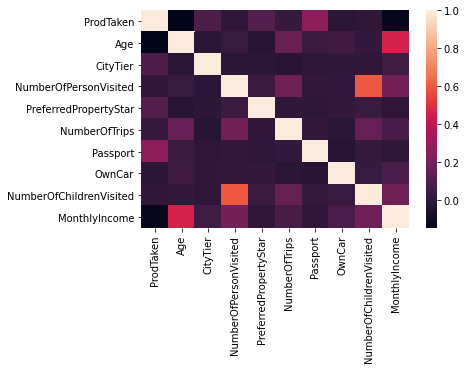

In [29]:
sns.heatmap(corr)

### Functions

In [30]:
#Functions we will be using
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [31]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores



In [32]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))



### Splitting Data

In [35]:
df_filter = df.copy()
df_filter = df_filter.drop(['CustomerID'], axis=1)

X = df_filter.drop('ProdTaken', axis=1)
# Encoding the following features. Will also encode "passport" as it is currently a continous variable 
# and we should treat it as a categorical.
X = pd.get_dummies(X, columns=['TypeofContact', 'Occupation', 'Gender', 'MaritalStatus', 'Designation', 'Passport', 'NumberOfPersonVisited', 'CityTier', 'OwnCar', 'PreferredPropertyStar', 'NumberOfChildrenVisited','NumberOfTrips'])
y = df_filter['ProdTaken']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)



In [36]:
X.head()

,Age,MonthlyIncome,TypeofContact_Company Invited,TypeofContact_Self Enquiry,Occupation_Free Lancer,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Female,Gender_Male,...,NumberOfTrips_1.0,NumberOfTrips_2.0,NumberOfTrips_3.0,NumberOfTrips_4.0,NumberOfTrips_5.0,NumberOfTrips_6.0,NumberOfTrips_7.0,NumberOfTrips_8.0,NumberOfTrips_19.0,NumberOfTrips_20.0
0,41.0,20993.0,0,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,49.0,20130.0,1,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,37.0,17090.0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,33.0,17909.0,1,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,35.0,18468.0,0,1,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0


### Model Building

### Bagging Classifier

In [37]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)



BaggingClassifier(random_state=1)

In [38]:
bagging_estimator_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  0.9911504424778761
Accuracy on test set :  0.8885832187070152
Recall on training set :  0.9533437013996889
Recall on test set :  0.5054151624548736
Precision on training set :  1.0
Precision on test set :  0.8484848484848485


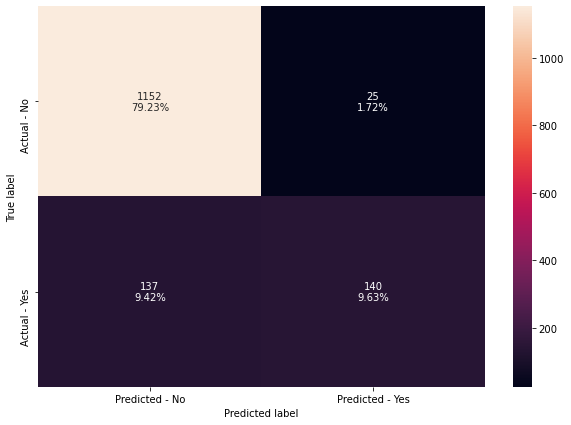

In [39]:
make_confusion_matrix(bagging_estimator,y_test)

### Insight:

The model is overfitting the training data set. We will adjust the hyperparameters to address this issue.

The recall is relatively poor.

That being said, the model is performing quite well.

### Bagging Classifier Tuning - Hyperparameters

In [ ]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=42)

parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the bagging_estimator to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_tuned_score=get_metrics_score(bagging_estimator_tuned)

In [ ]:
make_confusion_matrix(bagging_estimator_tuned,y_test)

### Insight:

The original Bagging Classifier performs relatively well. The tuned model performed slightly better however the recall decreased slightly between the defualt model and the tuned model.

Both models have excellent Accuracy and Precision for both the test & training data sets.

The tuned model sees improvement in overall accuracy.

However, both models seem to be overfitting the test data slightly. The accuracy and across both sets of data is good, so perhaps it's not overfitting as much as I initially suspected.

### Random Forest Classifier

In [252]:
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [253]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_score=get_metrics_score(rf_estimator)



Accuracy on training set :  1.0
Accuracy on test set :  0.8837689133425034
Recall on training set :  1.0
Recall on test set :  0.4657039711191336
Precision on training set :  1.0
Precision on test set :  0.86


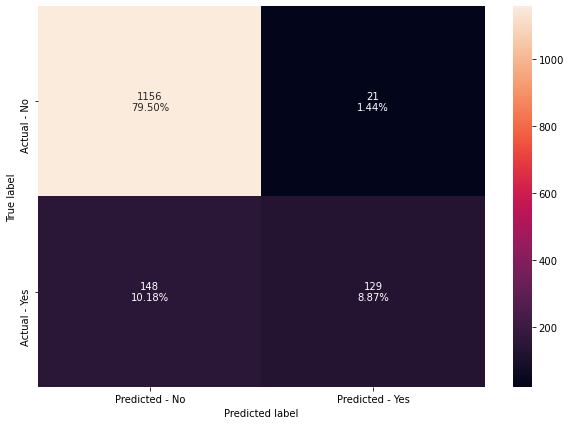

In [254]:
make_confusion_matrix(rf_estimator,y_test)



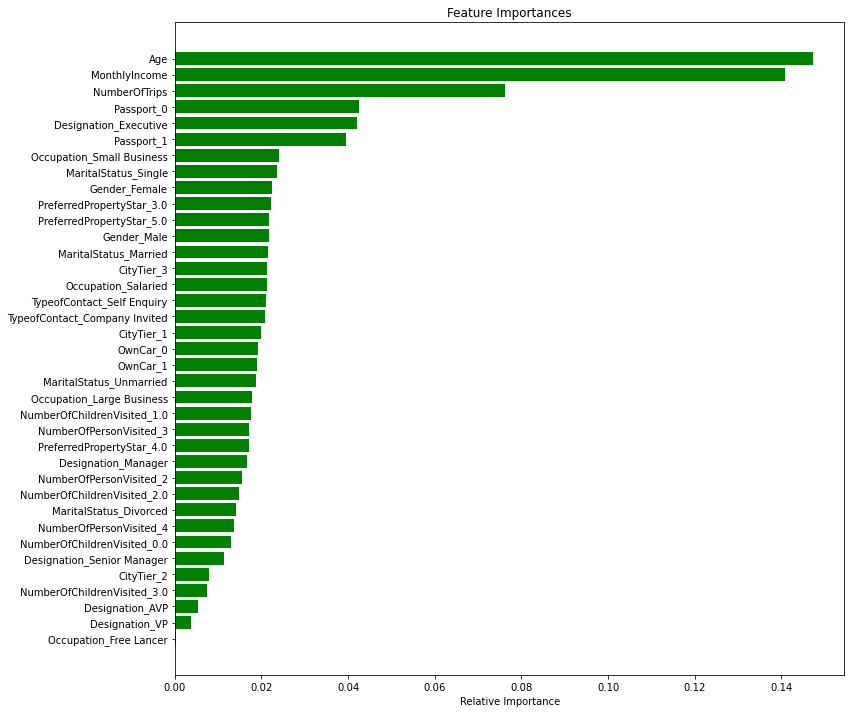

In [255]:
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Insight

The initial Random Forest model is overfitting the training data. We will tune the model to account for this.

The recall is relatively poor, which means we are missing out on a lot of potential customers if we do not improve the rate at which we are generating false negatives.

I suspect this has to do with the discrepancy in the data, specifically that ProdTaken = 1 is statiscally low. The data skews to ProdTaken = 0. We will account for this with tuning the hyperparmaters as well as the class_weight.

### Random Forest Tuning

In [256]:
rf_tuned = RandomForestClassifier(random_state=1)

#Adjusting parameters for the tuned model.
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the rf_tuned to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.6000000000000001,
                       max_samples=0.6000000000000001, min_samples_leaf=5,
                       n_estimators=250, random_state=1)

In [257]:
rf_tuned_score=get_metrics_score(rf_tuned)

Accuracy on training set :  0.9014749262536873
Accuracy on test set :  0.8583218707015131
Recall on training set :  0.5303265940902022
Recall on test set :  0.34296028880866425
Precision on training set :  0.9142091152815014
Precision on test set :  0.7983193277310925


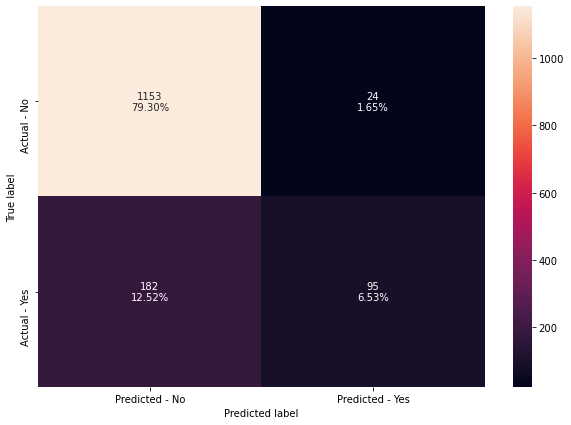

In [258]:
make_confusion_matrix(rf_tuned,y_test)

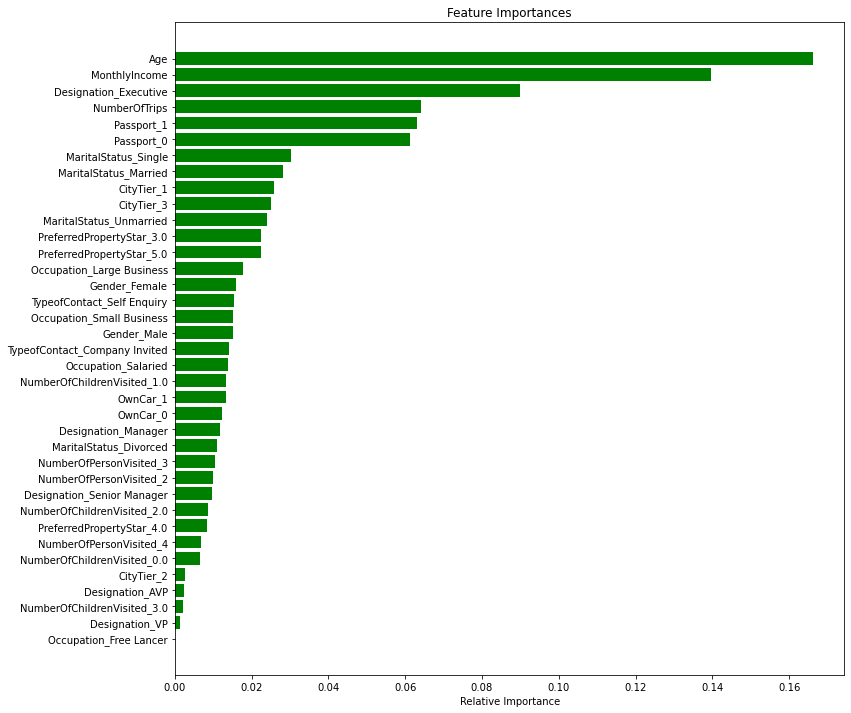

In [259]:
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


### Insight:

The recall score for the model is poor. We are intersted in increasing our accuracy in predicting Yes and it actually being yes. This is most likely to do with the distribution of the data.

We will adjust the class_weights parameter to account for the distribution of the data.

0.2 / 0.8 (rounded slightly: data is actually 0.18 / 0.82) will be utilized.

### Random Forest Tuning - class_weights

In [260]:
# Choose the type of classifier. 
rf_estimator_weighted = RandomForestClassifier(random_state=1)

#Using 0.2/0.8 weight as this mirrors the distribution of ProdTaken = 1 vs ProdTaken = 0 in our dataset.
parameters = {
    "class_weight": [{0: 0.2, 1: 0.8}],
    "n_estimators": [100,150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_weighted, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the rf_estimator_weighted to the best combination of parameters
rf_estimator_weighted = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_weighted.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8},
                       max_features=0.5000000000000001,
                       max_samples=0.6000000000000001, min_samples_leaf=9,
                       random_state=1)

In [261]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_weighted_score=get_metrics_score(rf_estimator_weighted)



Accuracy on training set :  0.8702064896755162
Accuracy on test set :  0.8328748280605227
Recall on training set :  0.7573872472783826
Recall on test set :  0.6028880866425993
Precision on training set :  0.6316472114137484
Precision on test set :  0.5566666666666666


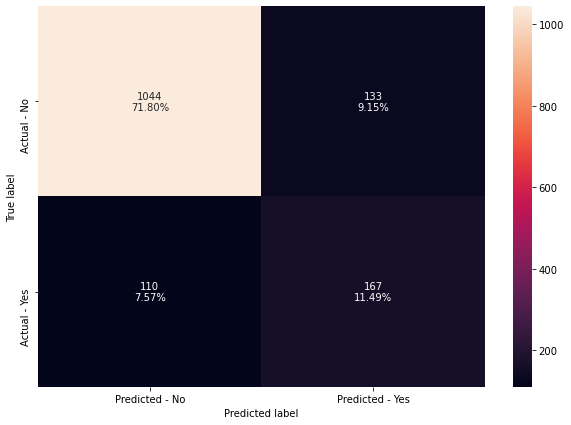

In [262]:
make_confusion_matrix(rf_estimator_weighted,y_test)



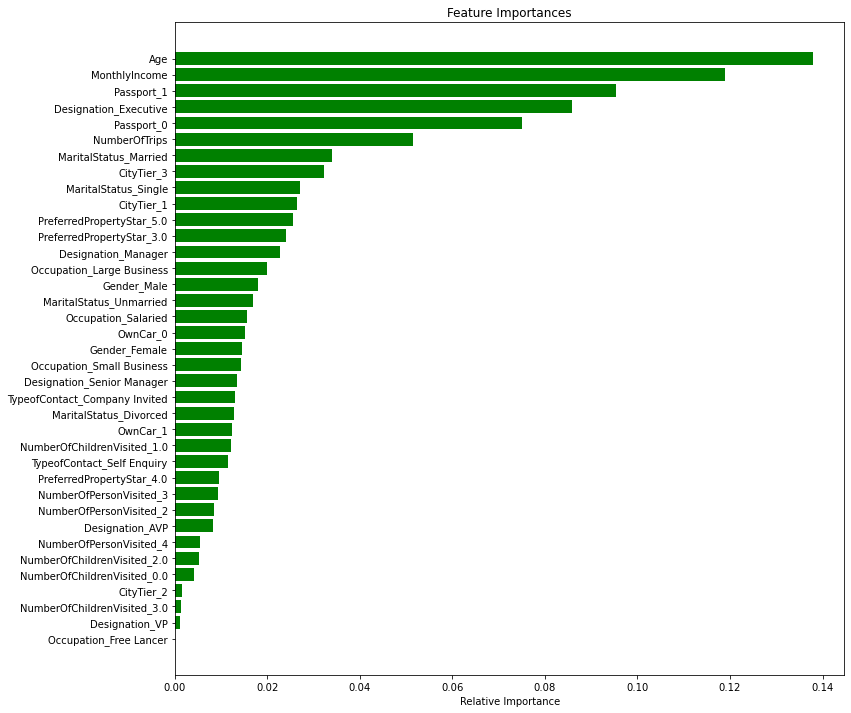

In [263]:
importances = rf_estimator_weighted.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



### Insight:

The results are a better performing model, the RF is no longer overfitting the dataset. Although the metrics are still not ideal with a relatively poor performance in recall.

The high number of False Negatives and False Positives is not ideal for either maximising potential customers as well as maximizing income from existing identified customers.

### Decision Tree Model

In [264]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)



DecisionTreeClassifier(random_state=1)

In [265]:
get_metrics_score(dTree)



Accuracy on training set :  1.0
Accuracy on test set :  0.842503438789546
Recall on training set :  1.0
Recall on test set :  0.5667870036101083
Precision on training set :  1.0
Precision on test set :  0.5902255639097744


[1.0, 0.842503438789546, 1.0, 0.5667870036101083, 1.0, 0.5902255639097744]

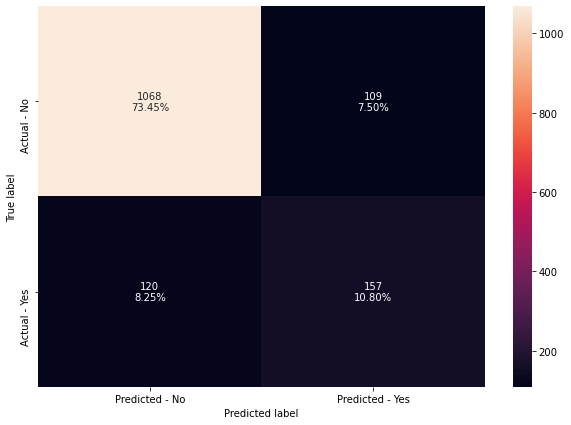

In [266]:
make_confusion_matrix(dTree,y_test)

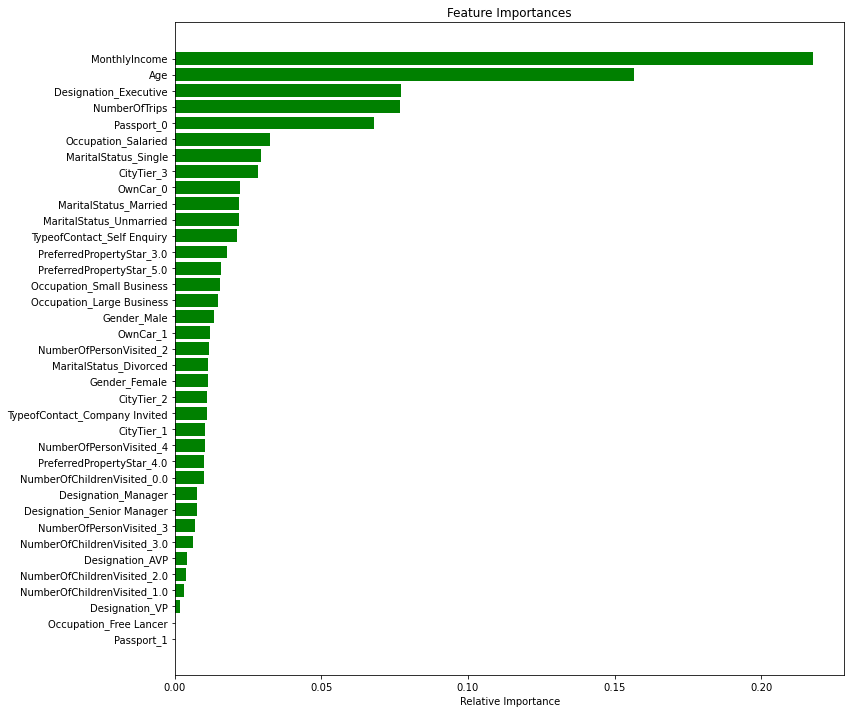

In [267]:
importances = dTree.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [268]:
feature_names = list(X.columns)
print(feature_names)



['Age', 'NumberOfTrips', 'MonthlyIncome', 'TypeofContact_Company Invited', 'TypeofContact_Self Enquiry', 'Occupation_Free Lancer', 'Occupation_Large Business', 'Occupation_Salaried', 'Occupation_Small Business', 'Gender_Female', 'Gender_Male', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single', 'MaritalStatus_Unmarried', 'Designation_AVP', 'Designation_Executive', 'Designation_Manager', 'Designation_Senior Manager', 'Designation_VP', 'Passport_0', 'Passport_1', 'NumberOfPersonVisited_2', 'NumberOfPersonVisited_3', 'NumberOfPersonVisited_4', 'CityTier_1', 'CityTier_2', 'CityTier_3', 'OwnCar_0', 'OwnCar_1', 'PreferredPropertyStar_3.0', 'PreferredPropertyStar_4.0', 'PreferredPropertyStar_5.0', 'NumberOfChildrenVisited_0.0', 'NumberOfChildrenVisited_1.0', 'NumberOfChildrenVisited_2.0', 'NumberOfChildrenVisited_3.0']


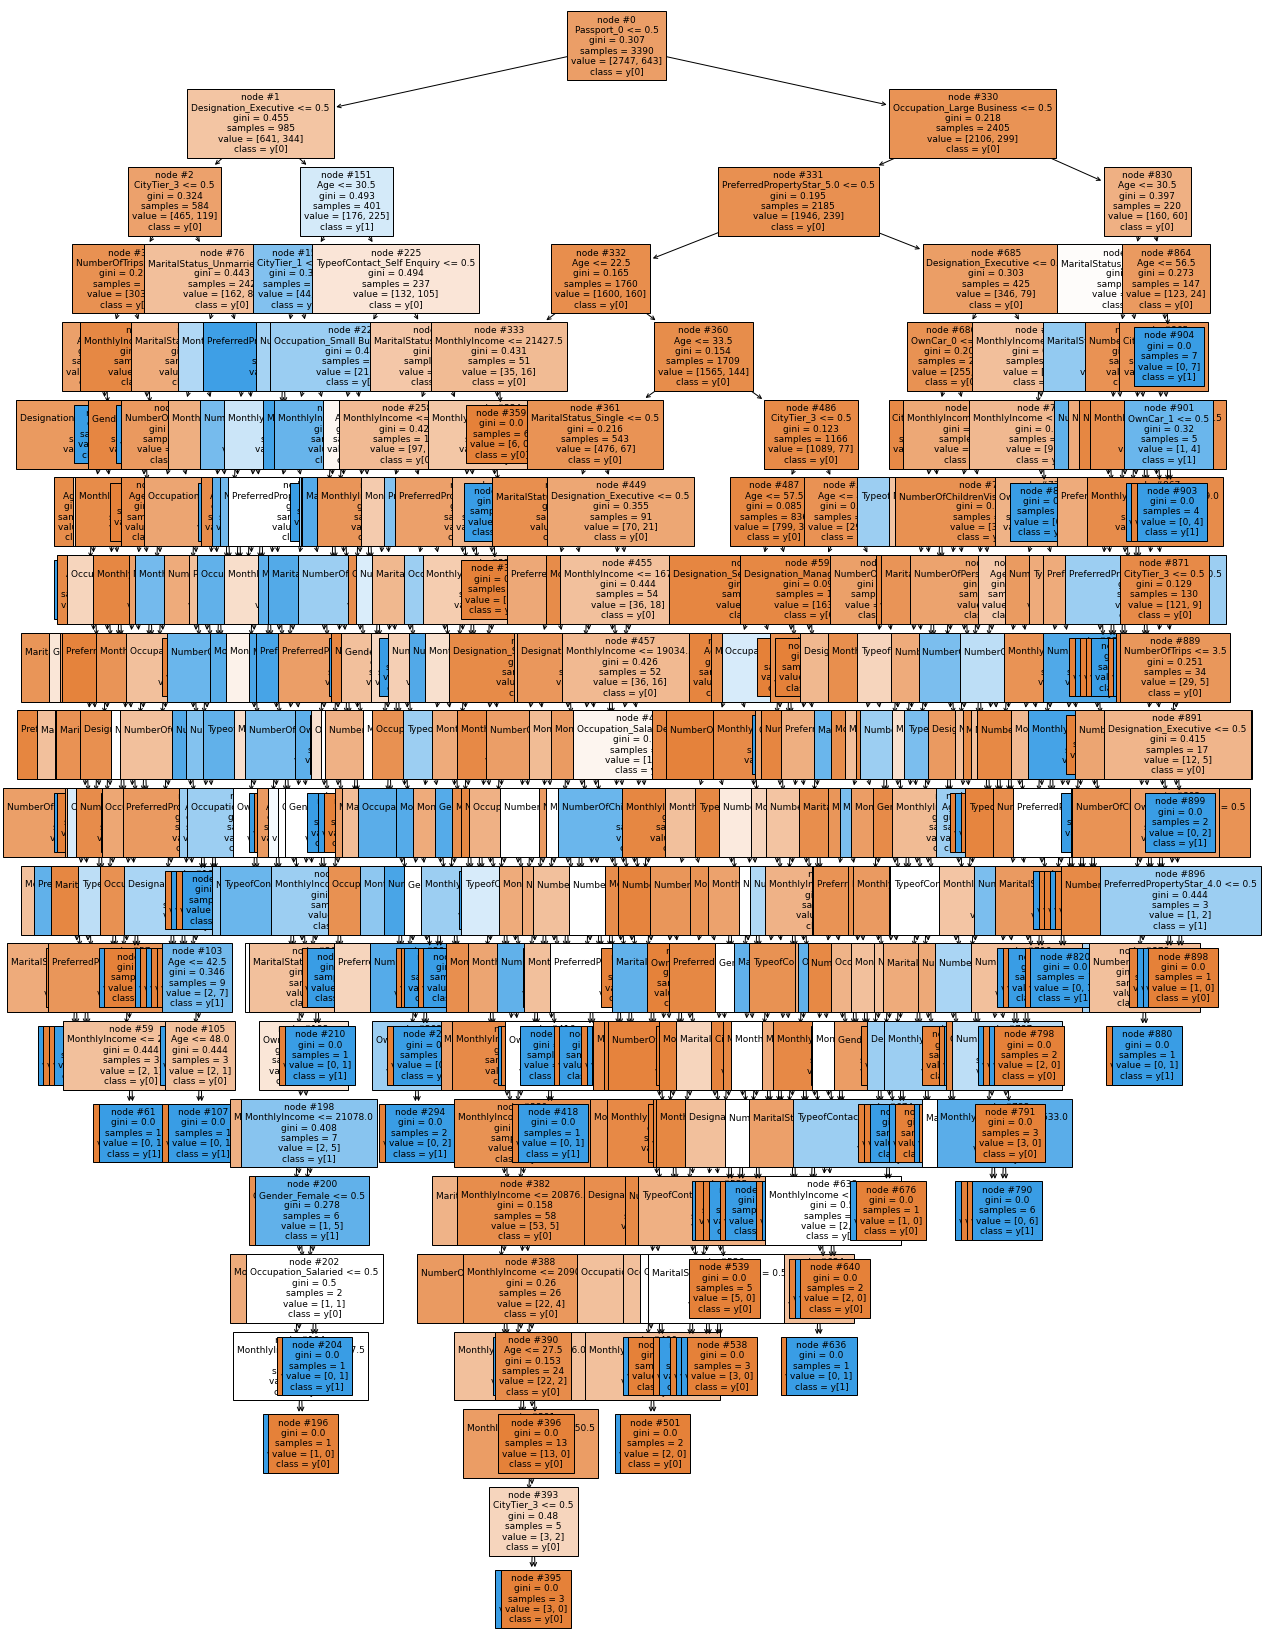

In [269]:
plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()



### Insight:

The original decision tree is overfitting the test data. We will address this issue by tuning the tree.

We will be using the GINI score as a tuning parameter, and set the max_depth to 3 to avoid the over fitting.

### Decision Tree Tuning - Using Gini

In [270]:
dec_tree = DecisionTreeClassifier(criterion = 'gini',max_depth=5,random_state=1)
dec_tree.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=5, random_state=1)

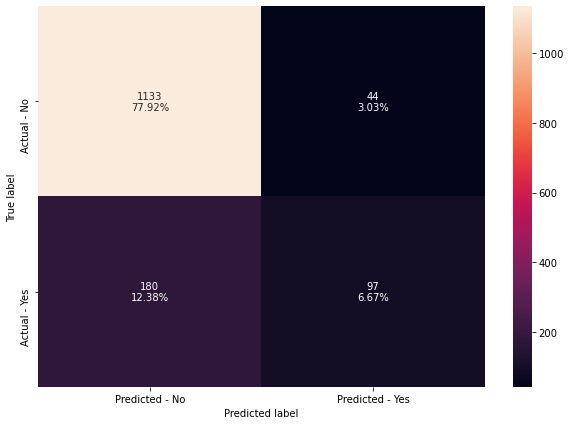

In [271]:
make_confusion_matrix(dec_tree, y_test)

In [272]:
dec_tree_score = get_metrics_score(dec_tree)



Accuracy on training set :  0.8631268436578171
Accuracy on test set :  0.8459422283356258
Recall on training set :  0.42923794712286156
Recall on test set :  0.35018050541516244
Precision on training set :  0.739946380697051
Precision on test set :  0.6879432624113475


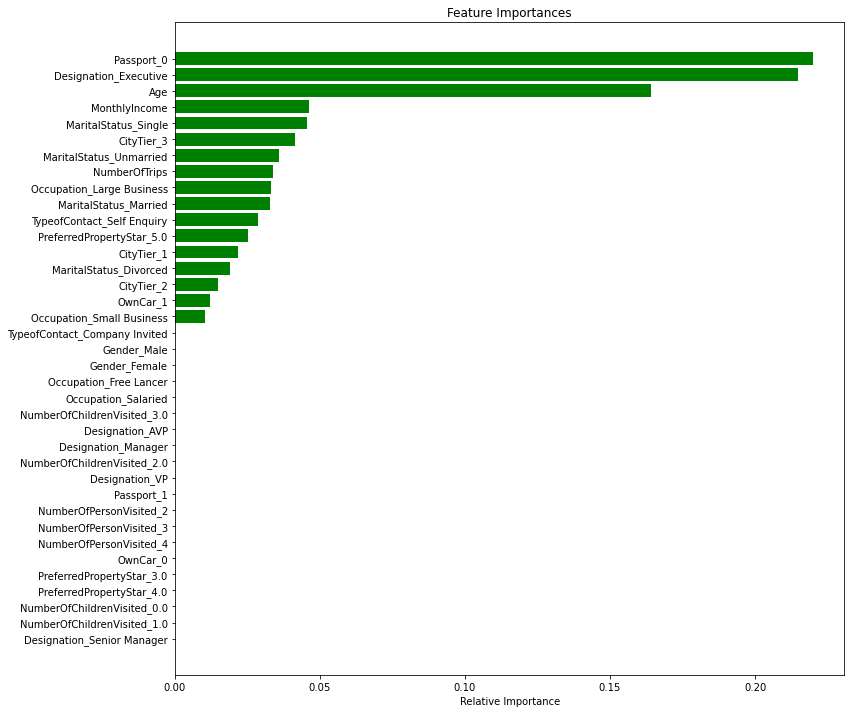

In [273]:
importances = dec_tree.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


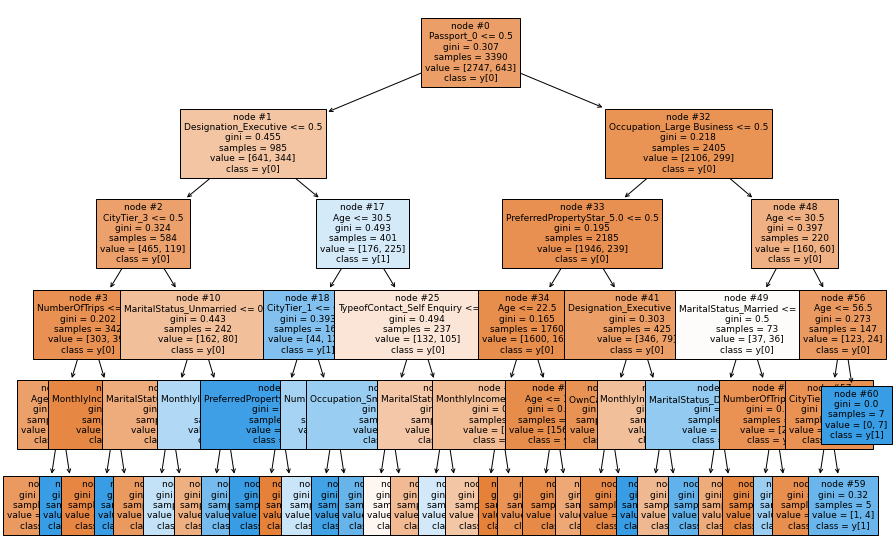

In [274]:
plt.figure(figsize=(15,10))

tree.plot_tree(dec_tree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()



### Insight:

The model is suboptimally assigning feature importances.

We have relatively good performance in accuracy, but poor performance in one of our key metrics (Recall). We will address these concerns by tuning the hyperparameters.

In [275]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)


parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the estimator to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=2, max_leaf_nodes=3,
                       min_impurity_decrease=0.001, random_state=1)

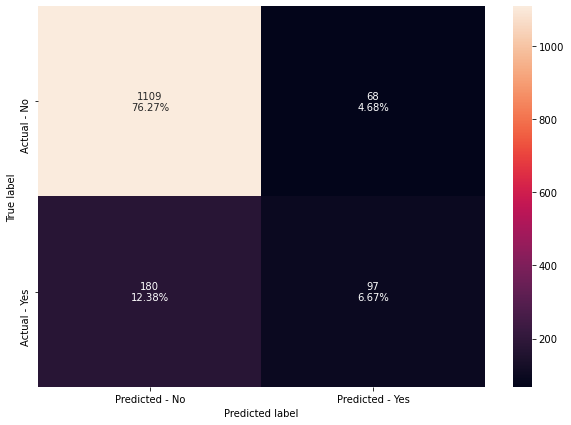

In [276]:
make_confusion_matrix(estimator,y_test)

In [277]:
estimator_score = get_metrics_score(estimator)



Accuracy on training set :  0.8247787610619469
Accuracy on test set :  0.8294360385144429
Recall on training set :  0.3499222395023328
Recall on test set :  0.35018050541516244
Precision on training set :  0.5610972568578554
Precision on test set :  0.5878787878787879


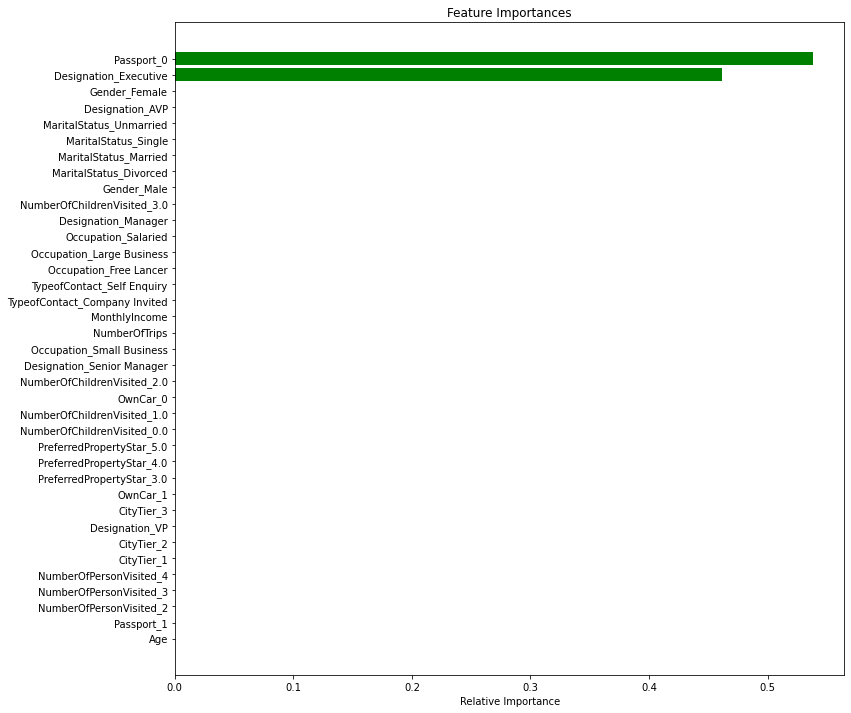

In [278]:
importances = estimator.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


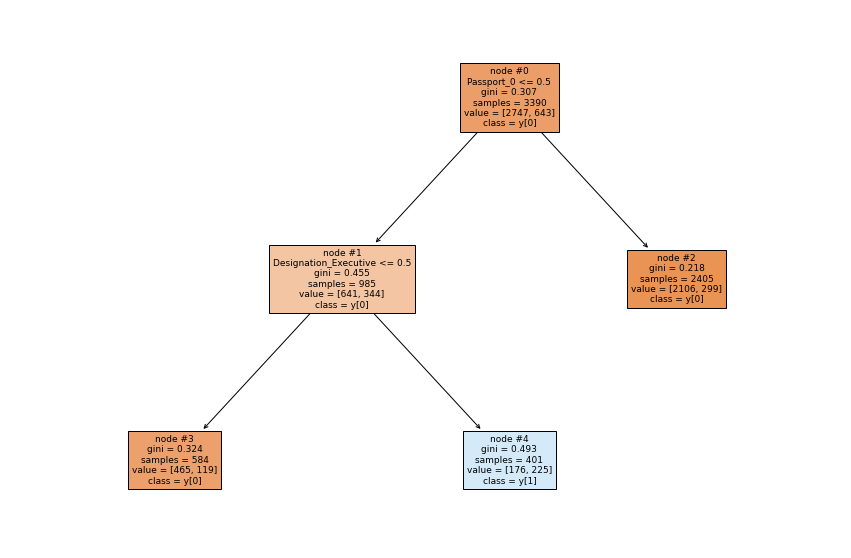

In [279]:
plt.figure(figsize=(15,10))

tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

### Bagging Models: Performance Evaluation

<b>Recall & Precision</b> are the metrics we are most interested in for the following reasons:
<ul>
    <li><b>Recall:</b> measures the models performance as far as predicting false negatives is concerned. This can be understood as the number of missed potential customers. For the business use case, a poor Recall score means we are losing out on potential income.</li>
    <li><b>Precision:</b> measures the models performance as far as predicting true positives is concerned. This directly impacts the models ability to accurately predict customers taking the Product offer. The lower the score, the potential loss of money from wastes marketing expenses increases. Directly impacting our bottom line.</li>
</ul>

Why not f1_score? f1_score equally assigns weighting to both Recall & Precision in it's calculation. This is not quite right for what we are attempting to achieve. We want to award bias to Precision, as it directly impacts the effectiveness of predicting the probability of a customer taking the product. But, Recall is still an important metric as we want to maximise the number of potential customers that we are able to identify and accurately predict.

<b>Bagging Models:</b>

The initial Bagging and Tuned Bagging models are performing well in our target performance metrics.

We tuned the following hpyerparameters to address the slightly overtuned initial model, and in an attemp to improve our target metrics: 'max_samples', 'max_features', 'n_estimators'

The tuned model improves the target metrics significantly. The precision and recall improvements are positive for our business use case.

<b>Random Forest Models:</b>

The initial Random Forest model is overfitting the training data, and performing relatively poorly on one of our performance metrics, specifically recall. 

While we are happy with the precision of the model, we must take the loss of potential customers seriously. We adjusted the hyperparamters for the RF model, specifically "n_estimators", "min_samples_leaf", "max_features","max_samples".

This results in a better performing model, but still not aduquate as the model is overfitting the training data. We then accounted for the overfitting by tuning the class_weights to account for the distibution of our target variable. The final Random Forest model performed better as far as our target performance metrics are concerned, however, the Bagging Models still perform better.

<b>Decision Tree Models:</b>

The Decision Tree is overfitting, and performing relatively poorly on one of our performance metrics, specifically recall. 
While we are happy with the precision of the model, we must take the loss of potential customers seriously. 

We adjusted the Decision Tree by tuning it according to the GINI score of each leaf node. This results in a better performing model, but still not aduquate. While this fixed the overfitting issue, our performance metrics decreased which is not ideal.

We then accounted for the overfitting by tuning the hyperparameters 'max_depth', 'max_leaf_nodes','min_impurity_decrease'.

The Decision Tree models continued to perform poorly after the tuning models. While we managed to address the overfitting of the models, our target variables were poor. Apart from Precision being relatively good, our recall performance did not impress.

<b>Conclusion for Bagging Models:</b>

The Tuned Bagging Classifier outperforms the Decision Tree & Random Forest Models in the performance metrics we identified.

### Model building - Boosting

### AdaBoost

In [280]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)



AdaBoostClassifier(random_state=1)

In [281]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(abc)



Accuracy on training set :  0.8412979351032448
Accuracy on test set :  0.8459422283356258
Recall on training set :  0.27682737169517885
Recall on test set :  0.2851985559566787
Precision on training set :  0.7091633466135459
Precision on test set :  0.7523809523809524


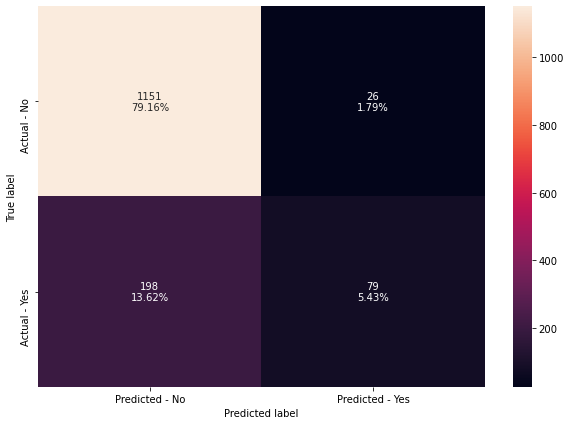

In [282]:
make_confusion_matrix(abc,y_test)

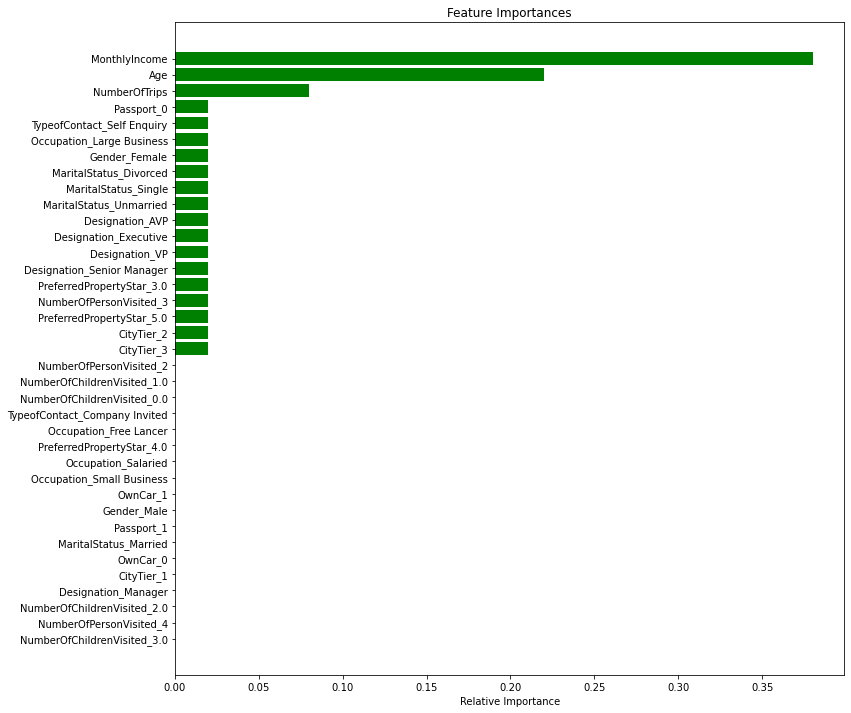

In [283]:
importances = abc.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


### Insight:

The base ABC model is yielding relatively good results as far as accuracy and precision are concerned.

We ideally want to improve the feature importance distribution, and improve the recall score as we identified in the Bagging models why we are targeting Recall & Precision.

We will address these improvements through tuning the hyperparameters.

In [284]:
abc_tuned = AdaBoostClassifier(random_state=1)

#Changed n_estimators but the model ended up overfitting.
#Changed to n_estimators 10,110,10
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.7000000000000002, n_estimators=100,
                   random_state=1)

In [285]:
abc_tuned_score=get_metrics_score(abc_tuned)

Accuracy on training set :  0.959882005899705
Accuracy on test set :  0.8507565337001376
Recall on training set :  0.8678071539657853
Recall on test set :  0.5379061371841155
Precision on training set :  0.916256157635468
Precision on test set :  0.6260504201680672


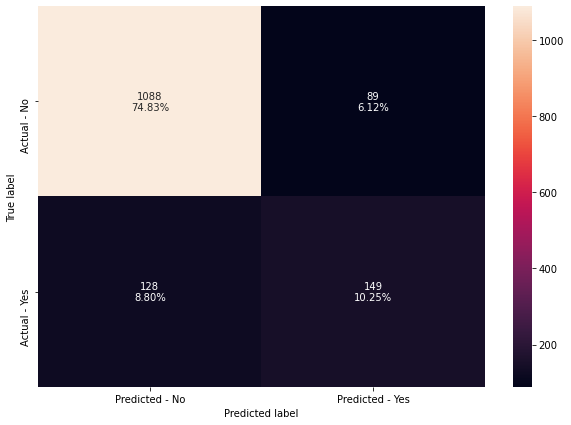

In [286]:
make_confusion_matrix(abc_tuned,y_test)

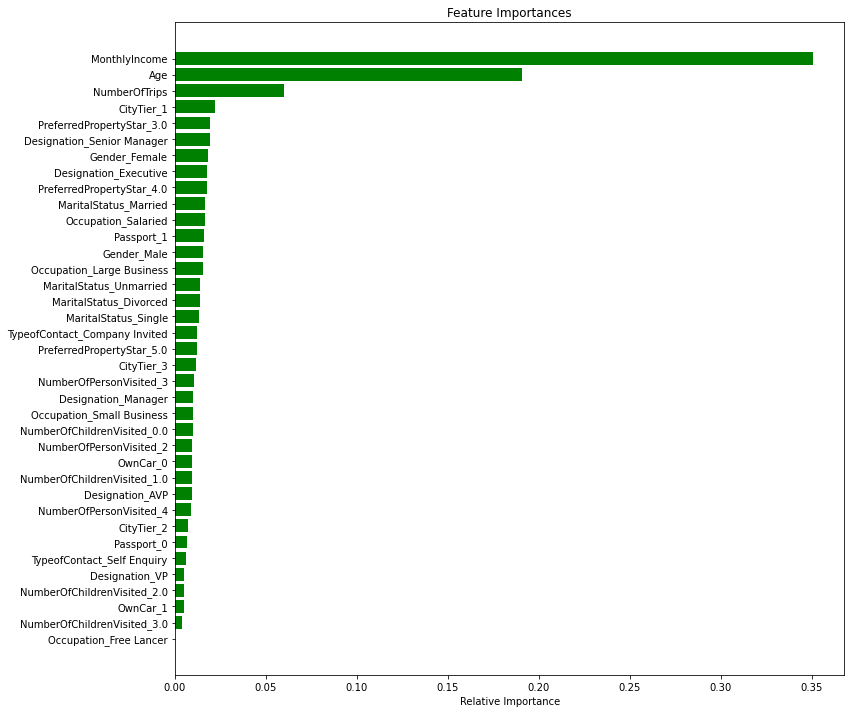

In [287]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Insight:

We have succesfully improved the AdaBoost Models performance scores quite dramatically, while improving the distribution of the use of different features in the model. 

However, we have decreased the precision on the test dataset which runs counter to the intended increase of our target performance metrics.


### Gradient Boosting Classifier

In [288]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)



GradientBoostingClassifier(random_state=1)

In [289]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)



Accuracy on training set :  0.8831858407079646
Accuracy on test set :  0.8569463548830811
Recall on training set :  0.45878693623639194
Recall on test set :  0.33574007220216606
Precision on training set :  0.8600583090379009
Precision on test set :  0.7948717948717948


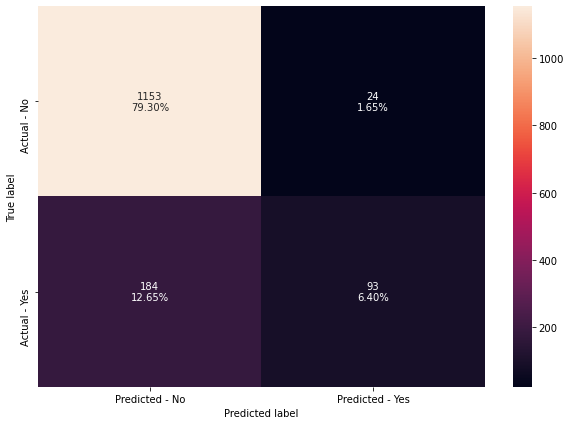

In [290]:
make_confusion_matrix(gbc,y_test)

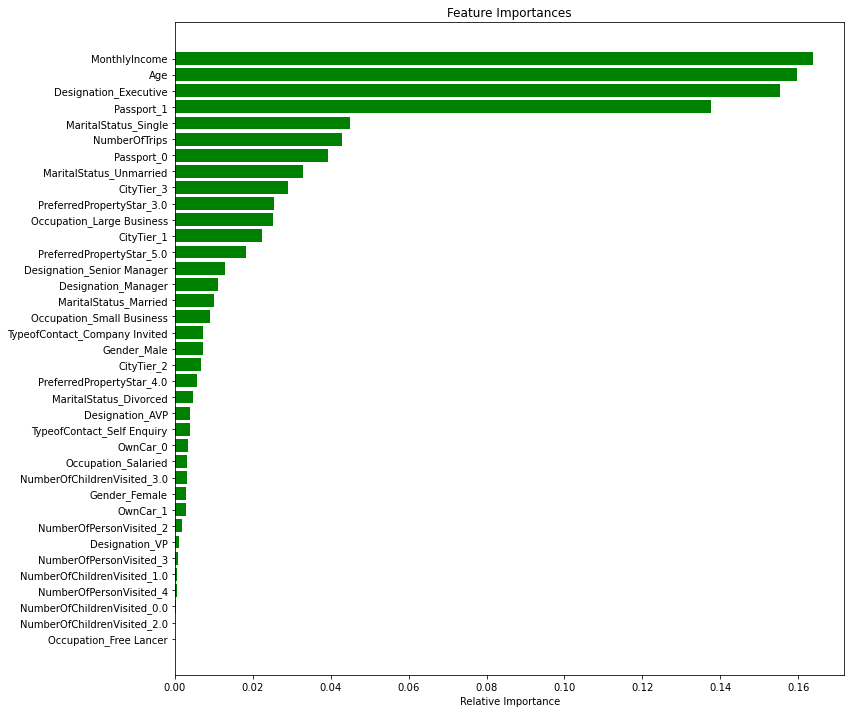

In [291]:
importances = gbc.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Insight:

The initial GBC model performs well, however the recall is rather poor.

We will be tuning the model to attempt to improve the metrics, specifially the recall.

In [292]:
#### Tuning with AdaBoost as Initial predictor

gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [293]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_init_score=get_metrics_score(gbc_init)



Accuracy on training set :  0.8840707964601769
Accuracy on test set :  0.859009628610729
Recall on training set :  0.4525660964230171
Recall on test set :  0.34296028880866425
Precision on training set :  0.8765060240963856
Precision on test set :  0.8050847457627118


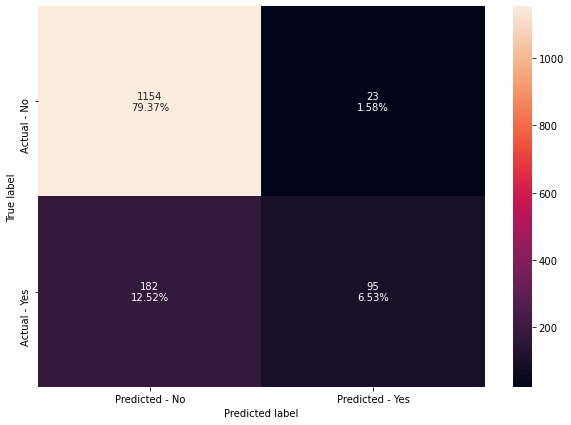

In [294]:
make_confusion_matrix(gbc_init,y_test)

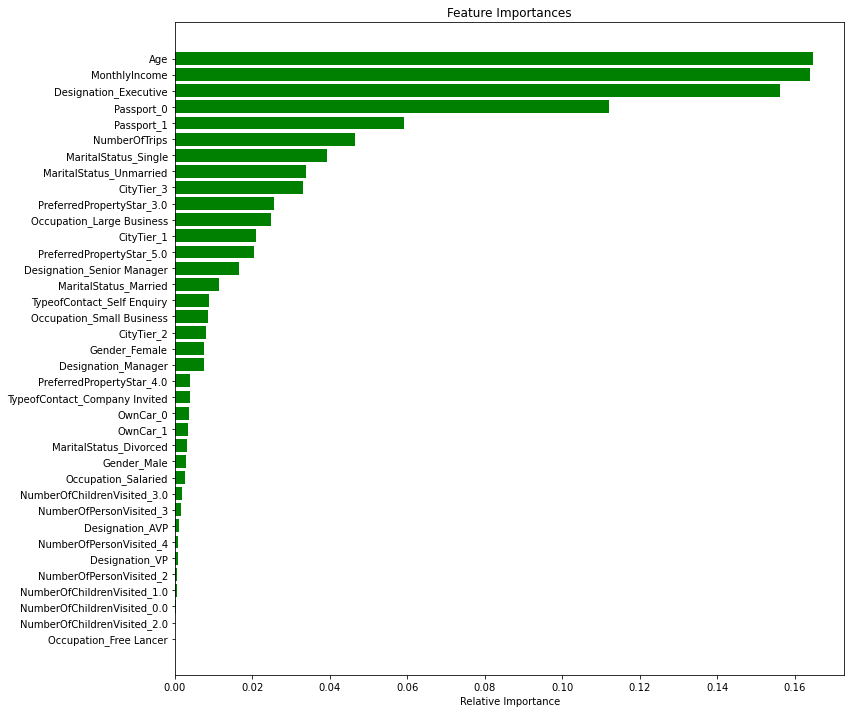

In [295]:
importances = gbc_init.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


### Insight:

We still a slight increase in both recall and precision. This is good, considering its an improvement but we can do better.

We will tune hyperparameters next in an attemp to improve the overall scores.

The recall score is in most need of improvement.

### Tuning Gradient Boosting - AdaBoost & Hyperparameters

In [296]:
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, n_estimators=250, random_state=1,
                           subsample=0.9)

In [297]:
gbc_tuned_score=get_metrics_score(gbc_tuned)

Accuracy on training set :  0.9150442477876106
Accuracy on test set :  0.8686382393397524
Recall on training set :  0.6049766718506998
Recall on test set :  0.4223826714801444
Precision on training set :  0.9196217494089834
Precision on test set :  0.7905405405405406


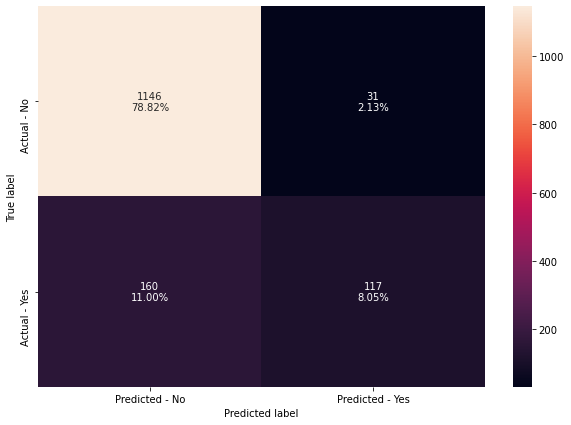

In [298]:
make_confusion_matrix(gbc_tuned,y_test)



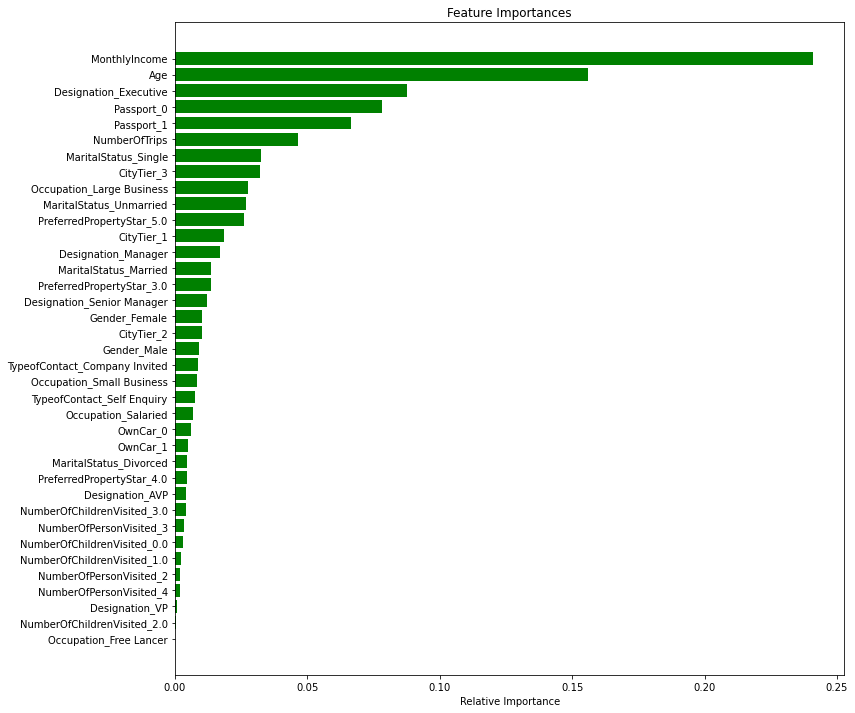

In [299]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



### Insight:

We continued to see improvment in recall and precision through hyperparameter tuning.

However, it's still not performing as well as we want for use in our business case.

### XGBoost Classifer

In [300]:
xgb = XGBClassifier(random_state=1, verbosity=0)
xgb.fit(X_train,y_train)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=20, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

In [301]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_score=get_metrics_score(xgb)





Accuracy on training set :  0.9976401179941002
Accuracy on test set :  0.8940852819807428
Recall on training set :  0.9875583203732504
Recall on test set :  0.5451263537906137
Precision on training set :  1.0
Precision on test set :  0.8435754189944135


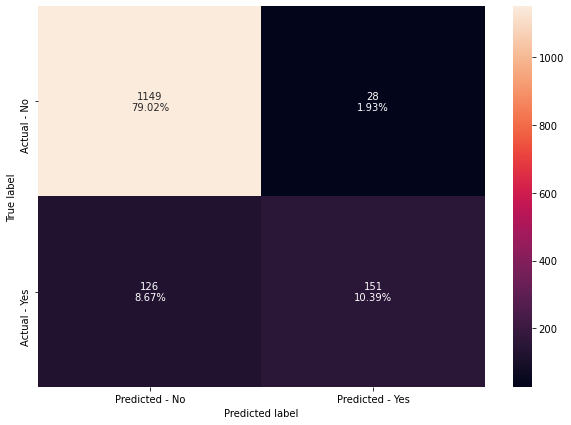

In [302]:
make_confusion_matrix(xgb,y_test)

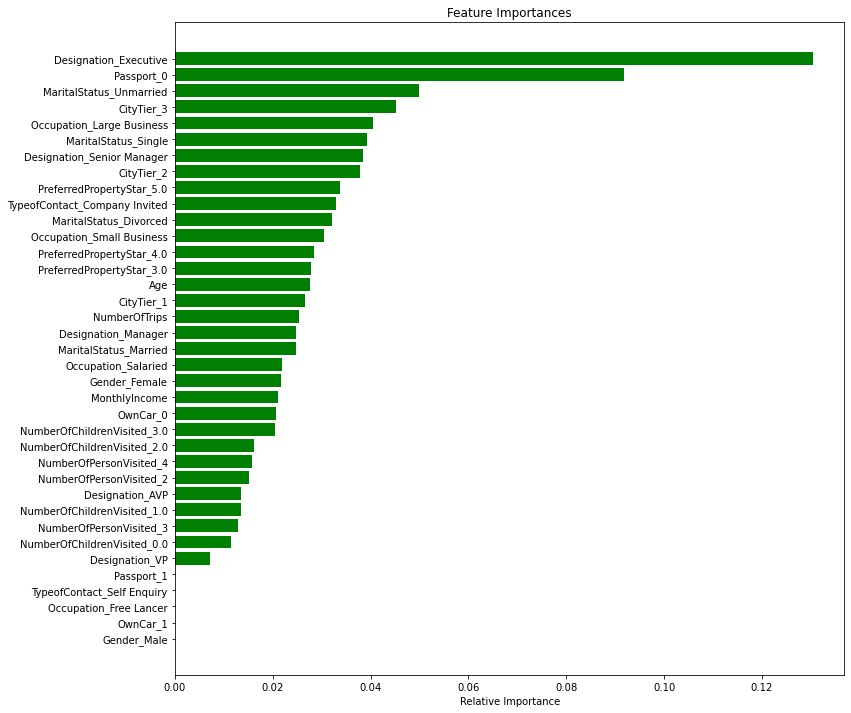

In [303]:
importances = xgb.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Insight:

The default XGB Model performs well compared to the other default models. There is a concern for overfitting, and we will address this with the learning_rate parameter.

We see a good precision result, as well as a relatively good Recall score on the test data.

We will tune the XGB model by setting some hyperparameters to account improve the Recall.

The initial numbers for False Positive are good. We should attempt to improve the rate at which we are missing out on potential customers through reducing the False Positive number.

### Tuning XGBoost

In [304]:
#Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, verbosity=0)

parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=20, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

In [305]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_tuned_score=get_metrics_score(xgb_tuned)



Accuracy on training set :  0.796165191740413
Accuracy on test set :  0.7434662998624484
Recall on training set :  0.8413685847589425
Recall on test set :  0.7148014440433214
Precision on training set :  0.47876106194690266
Precision on test set :  0.4024390243902439


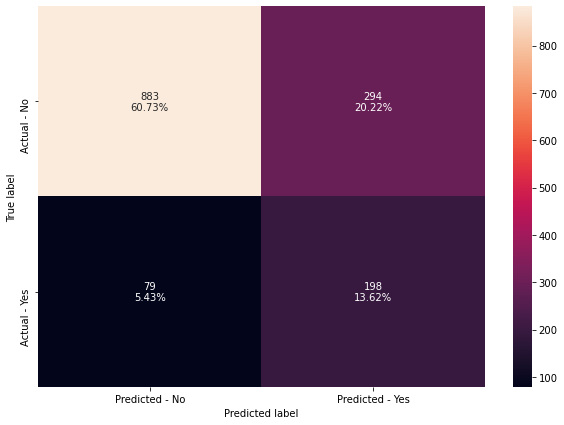

In [306]:
make_confusion_matrix(xgb_tuned,y_test)

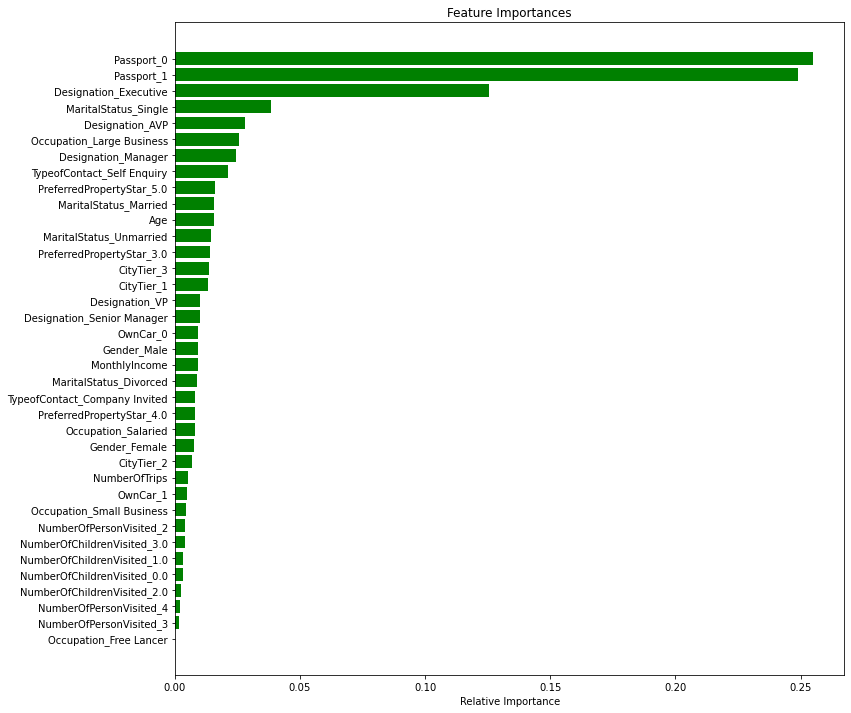

In [307]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Insight:

We succesfully improved our Recall metric. Unfortunately it came at the cost of dramatically removing the performance of the other scores.

### Stacking

In [308]:
layer_one_estimators = [
                        ('rf_1', RandomForestClassifier(n_estimators=10, random_state=42)),
                        ('knn_1', KNeighborsClassifier(n_neighbors=5))             
                       ]
layer_two_estimators = [
                        ('dt_2', DecisionTreeClassifier()),
                        ('rf_2', RandomForestClassifier(n_estimators=50, random_state=42)),
                       ]
layer_two = StackingClassifier(estimators=layer_two_estimators, final_estimator=LogisticRegression())

# Create Final model by 
clf = StackingClassifier(estimators=layer_one_estimators, final_estimator=layer_two)

clf.fit(X_train, y_train).score(X_test, y_test)

0.8700137551581844

In [309]:
clf_score=get_metrics_score(clf)

Accuracy on training set :  0.9899705014749263
Accuracy on test set :  0.8700137551581844
Recall on training set :  0.9548989113530326
Recall on test set :  0.44404332129963897
Precision on training set :  0.9919224555735057
Precision on test set :  0.7784810126582279


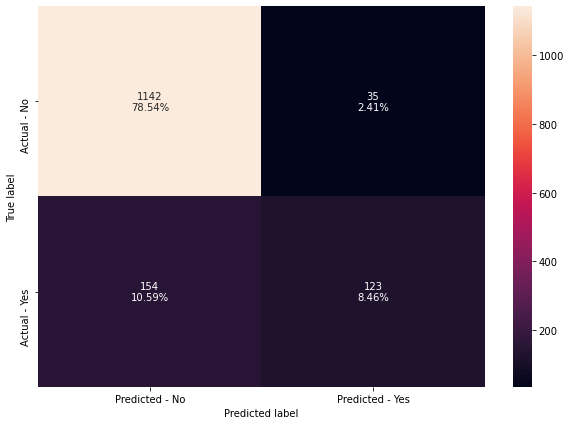

In [310]:
make_confusion_matrix(clf,y_test)

In [311]:
#Stacking tuned parameters
layer_one_estimators = [
                        ('rf_1', RandomForestClassifier(n_estimators=10, random_state=42)),
                        ('knn_1', KNeighborsClassifier(n_neighbors=10))             
                       ]
layer_two_estimators = [
                        ('dt_2', DecisionTreeClassifier()),
                        ('rf_2', RandomForestClassifier(n_estimators=115, random_state=42)),
                       ]
layer_two = StackingClassifier(estimators=layer_two_estimators, final_estimator=LogisticRegression())

# Create Final model by 
clf_tuned = StackingClassifier(estimators=layer_one_estimators, final_estimator=layer_two)

clf_tuned.fit(X_train, y_train).score(X_test, y_test)

0.8720770288858322

In [312]:
clf_tuned_score=get_metrics_score(clf_tuned)

Accuracy on training set :  0.983480825958702
Accuracy on test set :  0.8720770288858322
Recall on training set :  0.9222395023328149
Recall on test set :  0.4620938628158845
Precision on training set :  0.989983305509182
Precision on test set :  0.7757575757575758


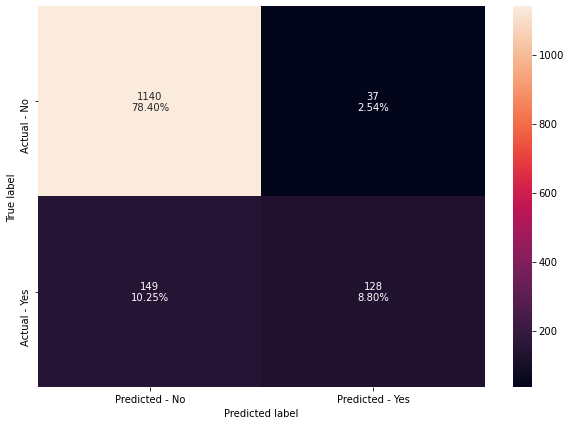

In [313]:
make_confusion_matrix(clf_tuned,y_test)

### Insight:

The Stacking model was assembled with a Random Forest, k-nearest-neighbors and Decision Tree model.

The defualt model yielded good results, with a high accuracy score and good precision. The recall metric can be improved. However, the number of FP was excellent. And the TP, FN numbers were also very good compared to previous models.

We ran a second stacking model with slightly different parameters in an attempt to primarily improve recall.

The tuned model yielded similar results. The recall did improve slightly whil maintaining similar performance in all other metrics.

Ultimately, the stacking model yielded very attractive results for the overall business use case.





### Boosting Models: Performance Evaluation

As with the bagging models, we will be reviewing the performance of the Boosting models by focusing on Precision, Recall as well as the maximizing of TP, and minimizing of FP. These metrics have been identified as they directly impact the success of the business use case.

#### Adaboost

The defuallt Adaboost model yielded relatively good results. However, the recall was very poor on our testing data set, and the precision of the model can be improved. We attempted to improve the target metrics through tuning the Adaboost model with the following hyperparameters: "base_estimator", "n_estimators", "learning_rate".

The tuned Adaboost model saw our target metrics improve dramatically. Overall, the improvement of Recall was excellent, and the slight improvement in Precision was welcomed.

The raw numbers of FP and TP were also improved, we captured more TP and reduced the total number of FP. This would ultimately see a better customer profile for the intention of maximizing the value captured by the new product offering.

#### Gradient Boost

The defualt Gradient Boost model performed well in Accuracy and Precision for both the training and test data splits. Unfortunately, the defualt model did not perform well in Recall. We will tune the model to improve on the overall metrics, specifically targeting an improved Recall score. Furthermore, we want to see an increase in the TP numbers, and ideally a decrease in the FN numbers.

The first of the two tuned models was done by passing through a Adaboost model. The Adaboost tuned GB Model saw an improvement in scores, notably: TP increased slightly, and FN recuded slightly while Recall remained the same but Precision on the test data set did improve. For the intended purposes of improving the target metrics, we did not see much of an improvement.

To further improve the scores of the GB Model, we tuned it again with hyperparameters: "n_estimators", "subsample", "max_features". The model saw an improvement in our target metric scores. Specifically, we saw an improvement in Recall on the test split, but at the cost of a reduction in our Precision metric. While we are pleased with the improvement in Recall, the Precision metric is just as important metric for our business use case.

The final tuned model did see a improvmment in the distribution of FN and TP, which was a welcomed improvement.

#### XGBoost

The defualt XGBoost model peformed well in accuracy and precision. The recall was also relatively good compared to our previous models. However, the model appears to be slightly overfit on the training data as denoted by the almost perfect accuracy and perfect precision score. We addressed these concerns by tuning the hyperparameters: "n_estimators", "scale_pos_weight", "subsample", "learning_rate", "gamma", "colsample_bytree", "colsample_bylevel". With learning_rate being the key parameter addressing the overfitting concern.

The tuned XGBoost model addressed the concerns of overfitting. It also improved on the Recall metric. However, the improvements in overfitting and recall came with the cost of significant increase in FP, and decrease in Precision.

This is not ideal. The increase in FP would yield in wasted expense of marketing products to customers who ultimately would not buy it. While the model does well in TP, we cannot ignore the expense incurred by the increase in FP.

#### Stacking

The two stacking models performed very similarly. When we attempted to tune some parameters, we did not see much of a change in our performance metric.

Overall, the stacking models performed well. Better than some of our previous models, notably in the raw numbers for TP and FP.

I am pleased with the performance of the stacking model. It will be on of the final candidates for model selection.



### Combining Model Results for Review

In [314]:
# defining list of models
models = [bagging_estimator, bagging_estimator_tuned, rf_estimator, rf_tuned, dTree, dec_tree, estimator, abc, abc_tuned, gbc, gbc_init, gbc_tuned, xgb, xgb_tuned, clf, clf_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []


# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
    



In [315]:
comparison_frame = pd.DataFrame({'Model':['Bagging Estimator', 'Bagging Estimator Tuned','Random Forest', 
                                          'Random Forest Tuned','Decision Tree', 'Decision Tree GINI', 'Decision Tree Tuned',
                                          'AdaBoost', 'AdaBoost Tuned','Gradient Boosting','Gradient Boosting with Ada',
                                         'Gradient Boosting Tuned', 'XGBoost', 'XGBoost Tuned', 'Stacking', 'Stacking Tuned'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame



,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Bagging Estimator,0.99,0.89,0.96,0.52,1.00,0.83
1,Bagging Estimator Tuned,1.00,0.89,0.99,0.52,1.00,0.86
2,Random Forest,1.00,0.88,1.00,0.47,1.00,0.86
3,Random Forest Tuned,0.90,0.86,0.53,0.34,0.91,0.80
4,Decision Tree,1.00,0.84,1.00,0.57,1.00,0.59
5,Decision Tree GINI,0.86,0.85,0.43,0.35,0.74,0.69
6,Decision Tree Tuned,0.82,0.83,0.35,0.35,0.56,0.59
7,AdaBoost,0.84,0.85,0.28,0.29,0.71,0.75
8,AdaBoost Tuned,0.96,0.85,0.87,0.54,0.92,0.63
9,Gradient Boosting,0.88,0.86,0.46,0.34,0.86,0.79


### Actionable Insights & Recommendations

The model that we will be selecting and recommending as the best option will be based on the overall performance metrics and the following criteria:
  <ul>
    <li>High Precision</li>
    <li>High Recall</li>
    <li>Maximimized TP</li>
    <li>Minimized FP</li>    
  </ul>
    
<b>Why maximised TP?</b>

The higher the number of True Positives we can capture, the better the model is performing in predicting our target variable.

<b>Why minimized FP?</b>

A low False Positive number reflects our models ability to identify a better customer target pool resulting in less loss of money on marketing expenses.

<b><u>Best Model: Default XGBoost</u></b>

The defualt XGBoost Model performed best when compared to all the other models.

While the XGBoost model did not have the highest Precision score on the test data, nor did it have the highest recall on the test data, it did have the best combination of maximized TP, minimized FP, accuracy, precision and recall.

The two tuned RF Models had better Precision scores, however, their FP and TP numbers were not optimal.

The Stacking models also perfomed very well, however the defualt XGB model improved on the FP/TP numbers which for us means we are able to maximise the potential customer pool while maintaing strong predictive measures.

Interpreting the different Feature Importances of the model yields an ideal target customer profile of the following:

A customer who is:

<ul>
    <li>Unmarried/Single/Divorced.</li>
    <li>Has a passport.</li>
    <li>Typically works for a large business in a senior role (Exuctive / Senior Manager)</li>
    <li>Has a taste for luxury based on their preferred property star</li>
    <li>And is invited by the company instead of enquiring about products on their own.</li>
</ul>

This would suggest an ideal target customer is considered to be in their mid to late thirties, with a high paying job, has a passport and penchent for luxury properties.

Based on the model, I would recommend that the new product be designed and marketed to the higher end spectrum of potential clients. This would fundamentally mean a smaller targeted effort to market a more expensive product to wealthy men or women who hold senior roles at larger businesses, have a passport and enjoy travelling.